Installing and Importing the required libraries.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 43.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR
import pmdarima as pm #auto arima
import sklearn.metrics as metrics

import shap #explainable AI - XAI
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

import torch
from torch.utils.data import Dataset,DataLoader
from torch import nn

from google.colab import files
import io
sns.set_theme(style="darkgrid", palette="rocket_r")

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_data.head(10)

Id        Date   Time  CO2_(dinning-room)  CO2_room  \
0   0  13/03/2012  11:45             216.560   221.920   
1   1  13/03/2012  12:00             219.947   220.363   
2   2  13/03/2012  12:15             219.403   218.933   
3   3  13/03/2012  12:30             218.613   217.045   
4   4  13/03/2012  12:45             217.714   216.080   
5   5  13/03/2012  13:00             218.389   216.011   
6   6  13/03/2012  13:15             218.155   215.829   
7   7  13/03/2012  13:30             216.661   215.296   
8   8  13/03/2012  13:45             217.461   214.549   
9   9  13/03/2012  14:00             215.349   213.909   

   Relative_humidity_(dinning-room)  Relative_humidity_room  \
0                           39.9125                 42.4150   
1                           39.9267                 42.2453   
2                           39.7720                 42.2267   
3                           39.7760                 42.0987   
4                           39.7757                 42.0686   
5                           39.8107                 42.0347   
6                           39.8613                 41.9947   
7                           39.8240                 41.9947   
8                           39.9587                 42.1253   
9                           39.9400                 42.0427   

   Lighting_(dinning-room)  Lighting_room  Meteo_Rain  Meteo_Sun_dusk  \
0                  81.6650       113.5200         0.0         623.360   
1                  81.7413       113.6050         0.0         623.211   
2                  81.4240       113.6000         0.0         622.656   
3                  81.5013       113.3440         0.0         622.571   
4                  81.4657       113.0340         0.0         622.400   
5                  81.2427       113.6000         0.0         622.400   
6                  81.3600       112.9810         0.0         622.400   
7                  81.0240       111.2590         0.0         621.803   
8                  81.1040        83.3547         0.0         620.651   
9                  81.1813        83.3600         0.0         620.309   

   Meteo_Wind  Meteo_Sun_light_in_west_facade  Meteo_Sun_light_in_east_facade  \
0     1.42625                         9690.24                        12604.20   
1     1.59200                        11022.00                        10787.20   
2     1.89133                        13960.50                         9669.63   
3     1.82800                        18511.20                         9648.13   
4     2.36071                        26349.00                         9208.32   
5     2.06333                        36511.70                         8694.78   
6     2.23067                        49288.50                         8501.25   
7     1.92400                        62253.70                         8687.62   
8     2.51067                        71453.40                         8888.32   
9     2.65333                        80076.80                         9046.02   

   Meteo_Sun_light_in_south_facade  Meteo_Sun_irradiance  \
0                          95436.8               758.880   
1                          95436.8               762.069   
2                          95398.6               766.251   
3                          95360.3               766.037   
4                          95354.9               762.743   
5                          95354.9               752.683   
6                          95354.9               740.949   
7                          95174.7               721.109   
8                          91848.7               699.392   
9                          87217.5               677.675   

   Outdoor_relative_humidity_Sensor  Day_of_the_week  Indoor_temperature_room  
0                           48.3750              2.0                  17.8275  
1                           47.8080              2.0                  18.1207  
2                           47.4320              2.0                  18.

In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_data.head(10)

Id        Date   Time  CO2_(dinning-room)  CO2_room  \
0  2764  18/04/2012  00:00             207.840   206.560   
1  2765  18/04/2012  00:15             207.499   206.101   
2  2766  18/04/2012  00:30             207.360   206.805   
3  2767  18/04/2012  00:45             207.445   206.325   
4  2768  18/04/2012  01:00             207.840   205.952   
5  2769  18/04/2012  01:15             207.648   206.357   
6  2770  18/04/2012  01:30             207.701   207.893   
7  2771  18/04/2012  01:45             208.309   207.637   
8  2772  18/04/2012  02:00             208.384   206.656   
9  2773  18/04/2012  02:15             208.512   206.176   

   Relative_humidity_(dinning-room)  Relative_humidity_room  \
0                           31.5800                 30.1600   
1                           31.6240                 30.0613   
2                           31.6507                 30.1773   
3                           31.6987                 30.2560   
4                           31.7707                 30.3840   
5                           31.9120                 30.4173   
6                           31.9800                 30.4333   
7                           32.0800                 30.6787   
8                           32.2693                 30.7760   
9                           32.6733                 31.1107   

   Lighting_(dinning-room)  Lighting_room  Meteo_Rain  Meteo_Sun_dusk  \
0                  11.7200        14.1600         0.0            0.65   
1                  11.5240        14.7600         0.0            0.65   
2                  11.6220        14.9547         0.0            0.65   
3                  11.7847        15.0520         0.0            0.65   
4                  11.5887        15.2147         0.0            0.65   
5                  11.6053        15.2147         0.0            0.65   
6                  11.6220        15.1333         0.0            0.65   
7                  11.6867        15.2467         0.0            0.65   
8                  11.7680        15.2307         0.0            0.65   
9                  11.5240        15.2467         0.0            0.65   

   Meteo_Wind  Meteo_Sun_light_in_west_facade  Meteo_Sun_light_in_east_facade  \
0    0.000000                             0.0                             0.0   
1    0.000000                             0.0                             0.0   
2    0.088000                             0.0                             0.0   
3    0.127333                             0.0                             0.0   
4    0.000000                             0.0                             0.0   
5    0.000000                             0.0                             0.0   
6    0.036000                             0.0                             0.0   
7    0.000000                             0.0                             0.0   
8    0.370000                             0.0                             0.0   
9    1.320670                             0.0                             0.0   

   Meteo_Sun_light_in_south_facade  Meteo_Sun_irradiance  \
0                              0.0              -3.12000   
1                              0.0              -2.80800   
2                              0.0              -2.96400   
3                              0.0              -3.02933   
4                              0.0              -2.88600   
5                              0.0              -2.88600   
6                              0.0              -2.96400   
7                              0.0              -2.88600   
8                              0.0              -2.88600   
9                              0.0              -2.88600   

   Outdoor_relative_humidity_Sensor  Day_of_the_week  
0                           39.0800              3.0  
1                           38.9680              3.0  
2                           38.9467              3.0  
3                           39.0760              3.0  
4                 

In [ ]:
data=train_data.copy()

In [ ]:
data.index=data.T.apply(lambda x:datetime.datetime.strptime(x.Date+x.Time,"%d/%m/%Y%H:%M"))
feature_cols=["CO2_(dinning-room)","CO2_room","Relative_humidity_(dinning-room)",\
              "Relative_humidity_room","Lighting_(dinning-room)","Lighting_room",\
              "Meteo_Rain","Meteo_Sun_dusk","Meteo_Wind","Meteo_Sun_light_in_west_facade",\
              "Meteo_Sun_light_in_east_facade","Meteo_Sun_light_in_south_facade",\
              "Meteo_Sun_irradiance","Outdoor_relative_humidity_Sensor","Day_of_the_week"]
label_col=["Indoor_temperature_room"]
data=data[feature_cols+label_col]
data

CO2_(dinning-room)  CO2_room  \
2012-03-13 11:45:00             216.560   221.920   
2012-03-13 12:00:00             219.947   220.363   
2012-03-13 12:15:00             219.403   218.933   
2012-03-13 12:30:00             218.613   217.045   
2012-03-13 12:45:00             217.714   216.080   
...                                 ...       ...   
2012-04-11 05:30:00             190.539   192.181   
2012-04-11 05:45:00             190.421   193.067   
2012-04-11 06:00:00             190.432   193.653   
2012-04-11 06:15:00             191.531   193.387   
2012-04-11 06:30:00             191.563   193.664   

                     Relative_humidity_(dinning-room)  Relative_humidity_room  \
2012-03-13 11:45:00                           39.9125                 42.4150   
2012-03-13 12:00:00                           39.9267                 42.2453   
2012-03-13 12:15:00                           39.7720                 42.2267   
2012-03-13 12:30:00                           39.7760                 42.0987   
2012-03-13 12:45:00                           39.7757                 42.0686   
...                                               ...                     ...   
2012-04-11 05:30:00                           41.3120                 41.6880   
2012-04-11 05:45:00                           41.3173                 41.7200   
2012-04-11 06:00:00                           41.3333                 41.7573   
2012-04-11 06:15:00                           41.3093                 41.8107   
2012-04-11 06:30:00                           41.2800                 41.8373   

                     Lighting_(dinning-room)  Lighting_room  Meteo_Rain  \
2012-03-13 11:45:00                  81.6650       113.5200         0.0   
2012-03-13 12:00:00                  81.7413       113.6050         0.0   
2012-03-13 12:15:00                  81.4240       113.6000         0.0   
2012-03-13 12:30:00                  81.5013       113.3440         0.0   
2012-03-13 12:45:00                  81.4657       113.0340         0.0   
...                                      ...            ...         ...   
2012-04-11 05:30:00                  11.4427        12.9400         0.0   
2012-04-11 05:45:00                  11.6867        19.3200         0.0   
2012-04-11 06:00:00                  19.5387        23.2427         0.0   
2012-04-11 06:15:00                  20.9853        23.4400         0.0   
2012-04-11 06:30:00                  20.5620        22.3080         0.0   

                     Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:45:00         623.360    1.426250   
2012-03-13 12:00:00         623.211    1.592000   
2012-03-13 12:15:00         622.656    1.891330   
2012-03-13 12:30:00         622.571    1.828000   
2012-03-13 12:45:00         622.400    2.360710   
...                             ...         ...   
2012-04-11 05:30:00         392.603    0.074667   
2012-04-11 05:45:00         613.120    0.000000   
2012-04-11 06:00:00         613.803    0.310667   
2012-04-11 06:15:00         615.403    0.299333   
2012-04-11 06:30:00         616.725    0.908000   

                     Meteo_Sun_light_in_west_facade  \
2012-03-13 11:45:00                         9690.24   
2012-03-13 12:00:00                        11022.00   
2012-03-13 12:15:00                        13960.50   
2012-03-13 12:30:00                        18511.20   
2012-03-13 12:45:00                        26349.00   
...                                             ...   
2012-04-11 05:30:00                            0.00   
2012-04-11 05:45:00                          465.92   
2012-04-11 06:00:00                         3454.98   
2012-04-11 06:15:00                         6795.26   
2012-04-11 06:30:00                         8952.83   

                     Meteo_Sun_light_in_east_facade  \
2012-03-13 11:45:00                        12604.20   
2012-03-13 12:00:00                        10787.20   
2012-03-13 12:15:00                         9669.63   
2012-03-13 12:30

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2012-03-13 11:45:00 to 2012-04-11 06:30:00
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CO2_(dinning-room)                2764 non-null   float64
 1   CO2_room                          2764 non-null   float64
 2   Relative_humidity_(dinning-room)  2764 non-null   float64
 3   Relative_humidity_room            2764 non-null   float64
 4   Lighting_(dinning-room)           2764 non-null   float64
 5   Lighting_room                     2764 non-null   float64
 6   Meteo_Rain                        2764 non-null   float64
 7   Meteo_Sun_dusk                    2764 non-null   float64
 8   Meteo_Wind                        2764 non-null   float64
 9   Meteo_Sun_light_in_west_facade    2764 non-null   float64
 10  Meteo_Sun_light_in_east_facade    2764 non-null   float64
 11  Meteo_Sun_light_in_south_facade  

In [ ]:
data.describe()

CO2_(dinning-room)     CO2_room  Relative_humidity_(dinning-room)  \
count         2764.000000  2764.000000                       2764.000000   
mean           208.479123   211.065844                         44.878420   
std             27.032686    28.469144                          6.587440   
min            187.339000   188.907000                         27.084000   
25%            200.893250   202.682750                         40.351975   
50%            207.045500   209.408000                         45.434650   
75%            211.245500   213.218750                         49.352675   
max            594.389000   609.237000                         60.957300   

       Relative_humidity_room  Lighting_(dinning-room)  Lighting_room  \
count             2764.000000              2764.000000    2764.000000   
mean                47.321220                26.745381      40.732571   
std                  7.557795                23.298441      42.326087   
min                 29.594700                10.740000      11.328000   
25%                 42.531325                11.588700      13.265300   
50%                 47.534700                11.801300      17.690000   
75%                 52.685975                31.224000      52.057350   
max                 62.594700               110.693000     162.965000   

        Meteo_Rain  Meteo_Sun_dusk   Meteo_Wind  \
count  2764.000000     2764.000000  2764.000000   
mean      0.047033      325.369289     1.108531   
std       0.206705      305.062614     1.161283   
min       0.000000        0.606667     0.000000   
25%       0.000000        0.650000     0.094833   
50%       0.000000      611.797000     0.659000   
75%       0.000000      619.210750     1.971497   
max       1.000000      624.960000     6.321330   

       Meteo_Sun_light_in_west_facade  Meteo_Sun_light_in_east_facade  \
count                     2764.000000                     2764.000000   
mean                     14936.617682                    12248.000148   
std                      25964.049455                    21758.550527   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                      15088.000000                    11131.275000   
max                      95278.400000                    85535.400000   

       Meteo_Sun_light_in_south_facade  Meteo_Sun_irradiance  \
count                      2764.000000           2764.000000   
mean                      22047.525813            215.010017   
std                       32709.387051            297.234046   
min                           0.000000             -4.164670   
25%                           0.000000             -3.381330   
50%                           0.000000              3.922000   
75%                       38736.575000            435.434500   
max                       95704.400000           1028.270000   

       Outdoor_relative_humidity_Sensor  Day_of_the_week  \
count                       2764.000000      2764.000000   
mean                          55.981988         3.954438   
std                           13.019610         1.991799   
min                           22.260700         1.000000   
25%                           46.430675         2.000000   
50%                           57.477350         4.000000   
75%                           65.649325         6.000000   
max                           83.805300         7.000000   

       Indoor_temperature_room  
count              2764.000000  
mean                 18.824852  
std                   2.821178  
min                  11.076000  
25%                  17.060350  
50%                  19.021000  
75%                  20.828700  
max                  24.944000

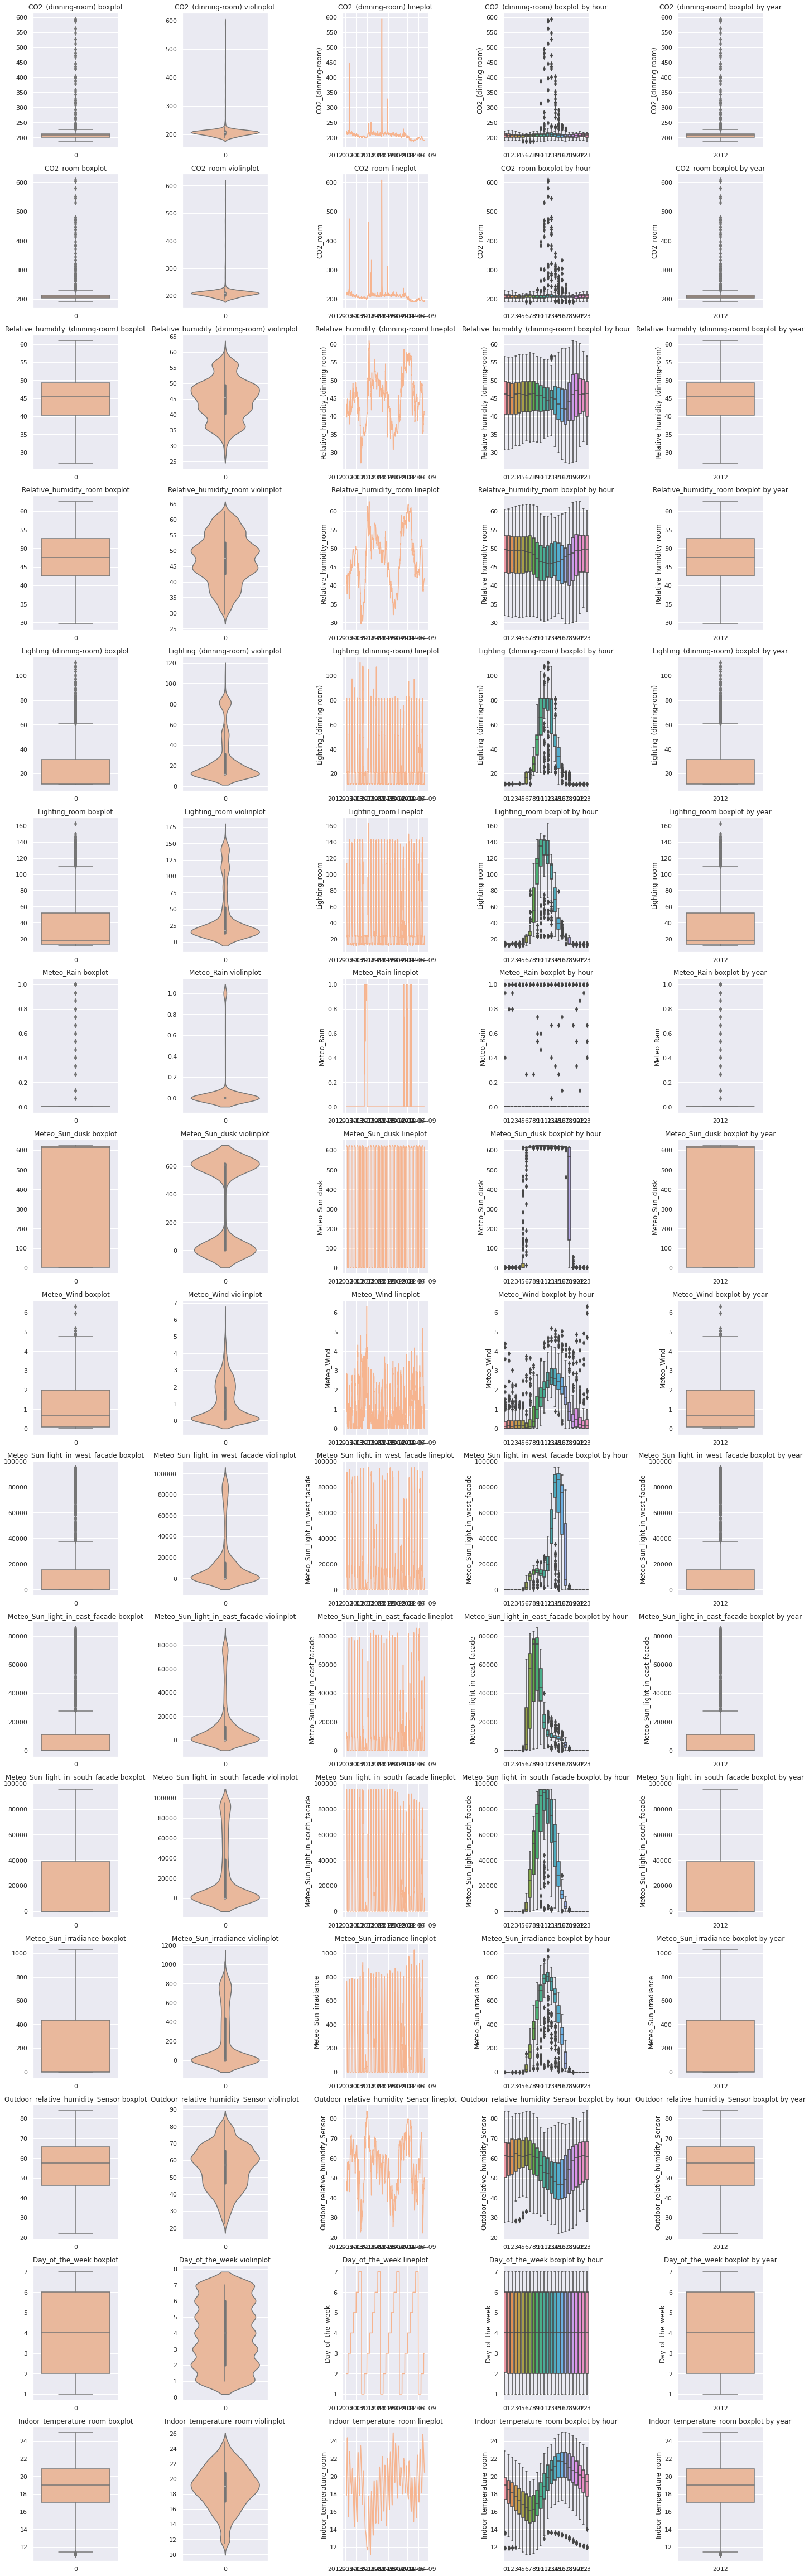

In [ ]:
fig,axes=plt.subplots(nrows=16, ncols=5,constrained_layout=True,figsize=(20,64))
for (ax,col) in zip(axes,data.columns):
    ax_=ax[0]
    sns.boxplot(data=data[col],ax=ax_)
    ax_.set_title(col+" boxplot")
    ax_=ax[1]
    sns.violinplot(data=data[col],ax=ax_)
    ax_.set_title(col+" violinplot")
    ax_=ax[2]
    sns.lineplot(data=data[col],ax=ax_)
    ax_.set_title(col+" lineplot")
    ax_=ax[3]
    sns.boxplot(x = data.index.hour,
                y = data[col],
                ax = ax_)
    ax_.set_title(col+" boxplot by hour")
    ax_=ax[4]
    sns.boxplot(x = data.index.year,
                y = data[col],
                ax = ax_)
    ax_.set_title(col+" boxplot by year")

In [ ]:
delta_time=datetime.timedelta(minutes=15)
start_time=data.index.min()
time_len=int((data.index.max()-start_time)/delta_time)+1
difference=data.index.difference([start_time+i*delta_time for i in range(time_len)])
if len(difference)==0:
    print("No missing values")

No missing values


In [ ]:
# spearman correlation between features and label
data.corr(method="spearman")[label_col].iloc[:-1,:]

Indoor_temperature_room
CO2_(dinning-room)                              -0.039568
CO2_room                                        -0.008734
Relative_humidity_(dinning-room)                -0.301342
Relative_humidity_room                          -0.411400
Lighting_(dinning-room)                         -0.061260
Lighting_room                                   -0.066660
Meteo_Rain                                      -0.201966
Meteo_Sun_dusk                                   0.066083
Meteo_Wind                                       0.269688
Meteo_Sun_light_in_west_facade                   0.202544
Meteo_Sun_light_in_east_facade                  -0.063907
Meteo_Sun_light_in_south_facade                  0.042983
Meteo_Sun_irradiance                            -0.075521
Outdoor_relative_humidity_Sensor                -0.493431
Day_of_the_week                                 -0.009875

In [ ]:
# pearson correlation between features and label
data.corr(method="pearson")[label_col].iloc[:-1,:]

Indoor_temperature_room
CO2_(dinning-room)                               0.061361
CO2_room                                         0.056195
Relative_humidity_(dinning-room)                -0.275193
Relative_humidity_room                          -0.417901
Lighting_(dinning-room)                          0.069264
Lighting_room                                    0.002253
Meteo_Rain                                      -0.262621
Meteo_Sun_dusk                                   0.068897
Meteo_Wind                                       0.220667
Meteo_Sun_light_in_west_facade                   0.335288
Meteo_Sun_light_in_east_facade                  -0.269034
Meteo_Sun_light_in_south_facade                  0.000072
Meteo_Sun_irradiance                             0.123390
Outdoor_relative_humidity_Sensor                -0.549681
Day_of_the_week                                  0.016517

In [ ]:
fig, axes = plt.subplots(nrows=16, ncols=1, dpi=120, figsize=(30,120))
for i, ax in enumerate(axes.flatten()):
    dataset = data[data.columns[i]]
    ax.plot(dataset, color='blue', linewidth=5)
    # Decorations
    ax.set_title(data.columns[i], fontsize=25)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=20)

plt.tight_layout();

In [ ]:
#test stationarity
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
#Call the adfuller_test() on each series.
# ADF Test on each column
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO2_(dinning-room)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4785
 No. Lags Chosen       = 15
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CO2_room" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3812
 No. Lags Chosen       = 16
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Relative_humidity_(dinning-room)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

As we can see from the Augmented Dickey-Fuller Test, only the Relative Humidity Room has a weak evidence of being Non-Stationary.

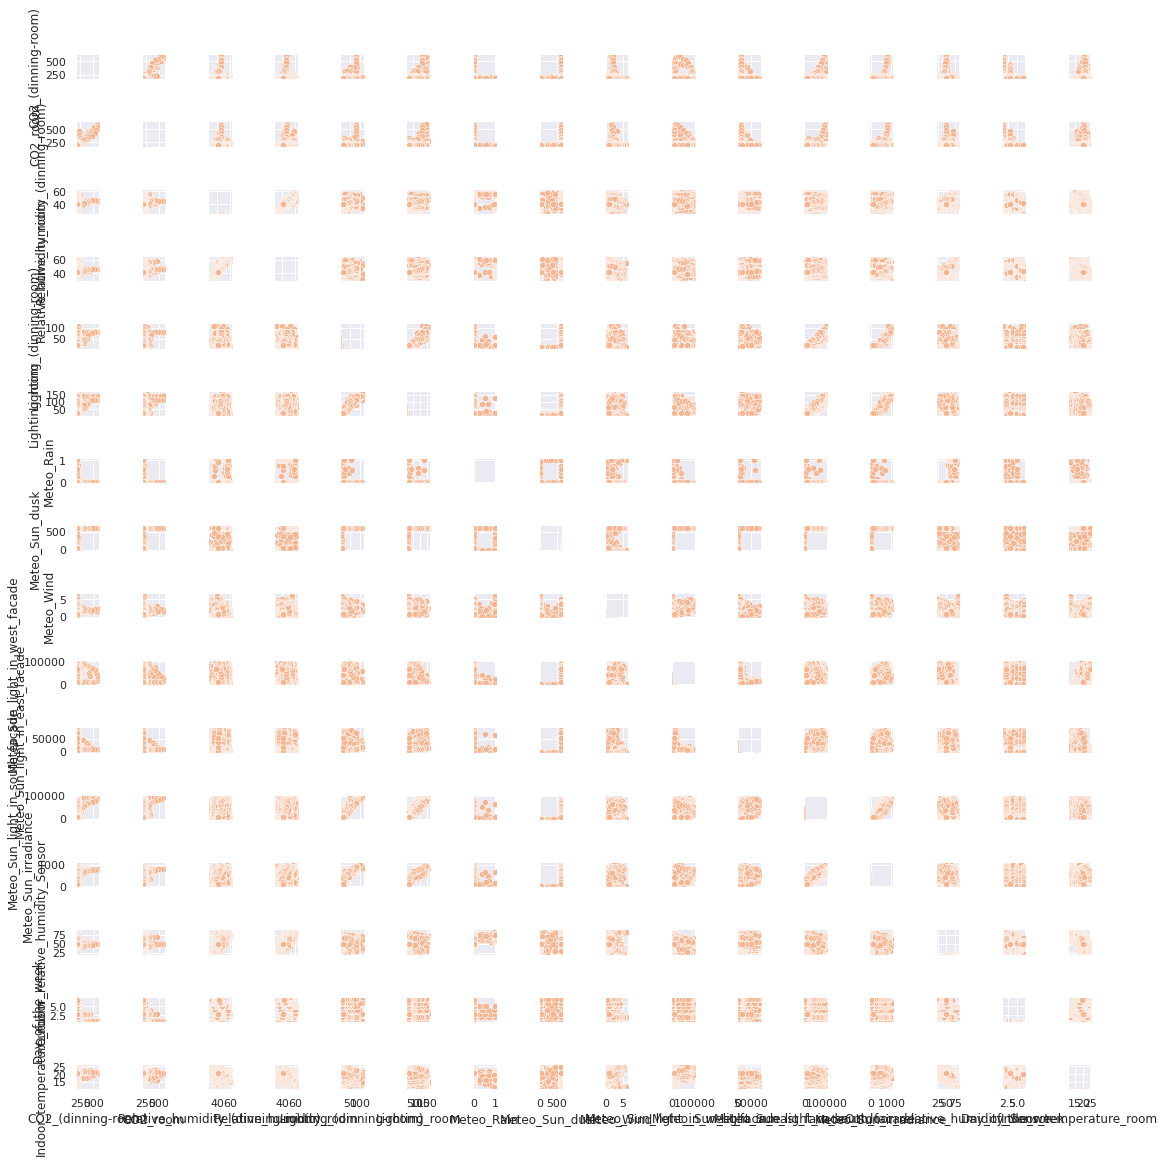

In [ ]:
pairplot=sns.pairplot(data)
pairplot.fig.set_size_inches(15,15)

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

                             feature         VIF
0                 CO2_(dinning-room)  424.108442
1                           CO2_room  406.704117
2   Relative_humidity_(dinning-room)  536.215656
3             Relative_humidity_room  658.024399
4            Lighting_(dinning-room)   69.119559
5                      Lighting_room   72.340969
6                         Meteo_Rain    1.889424
7                     Meteo_Sun_dusk    6.494756
8                         Meteo_Wind    6.389047
9     Meteo_Sun_light_in_west_facade    9.142620
10    Meteo_Sun_light_in_east_facade    5.765261
11   Meteo_Sun_light_in_south_facade   59.398508
12              Meteo_Sun_irradiance   81.360188
13  Outdoor_relative_humidity_Sensor  108.957051
14                   Day_of_the_week    5.287823
15           Indoor_temperature_room   51.214183


We can see from the above VIF dataframe that the columns such as CO2_(dinning-room), CO2_room, Relative_humidity_(dinning-room), Relative_humidity_room, Lighting_(dinning-room), Lighting_room, Outdoor_relative_humidity_Sensor have very high vif.

Hence, let us drop some of them from the dataset.

In [ ]:
# Indoor_temperature_room is the variable to be predicted, hence we will create a seperate series for that column

y= data.Indoor_temperature_room

data_dropped = data.drop(['CO2_(dinning-room)', 'Relative_humidity_(dinning-room)','Lighting_(dinning-room)','Outdoor_relative_humidity_Sensor','Indoor_temperature_room','Day_of_the_week'], axis = 1)


In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_dropped.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_dropped.values, i)
                          for i in range(len(data_dropped.columns))]

print(vif_data)

                           feature        VIF
0                         CO2_room  28.509899
1           Relative_humidity_room  27.590816
2                    Lighting_room  67.602693
3                       Meteo_Rain   1.416148
4                   Meteo_Sun_dusk   6.026655
5                       Meteo_Wind   5.390050
6   Meteo_Sun_light_in_west_facade   8.273463
7   Meteo_Sun_light_in_east_facade   3.228787
8  Meteo_Sun_light_in_south_facade  40.819038
9             Meteo_Sun_irradiance  71.330721


In [ ]:
data_dropped['Meteo_Sun_light']= data_dropped[['Meteo_Sun_light_in_west_facade','Meteo_Sun_light_in_east_facade','Meteo_Sun_light_in_south_facade']].mean(axis=1)

In [ ]:
data_dropped = data_dropped.drop(['Meteo_Sun_light_in_west_facade','Meteo_Sun_light_in_east_facade','Meteo_Sun_light_in_south_facade'], axis = 1)

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_dropped.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_dropped.values, i)
                          for i in range(len(data_dropped.columns))]

print(vif_data)

                  feature        VIF
0                CO2_room  26.163884
1  Relative_humidity_room  24.587312
2           Lighting_room  18.051768
3              Meteo_Rain   1.380758
4          Meteo_Sun_dusk   5.499016
5              Meteo_Wind   4.594809
6    Meteo_Sun_irradiance  32.295223
7         Meteo_Sun_light  12.702540


In [ ]:
data_dropped

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:45:00   221.920                 42.4150       113.5200   
2012-03-13 12:00:00   220.363                 42.2453       113.6050   
2012-03-13 12:15:00   218.933                 42.2267       113.6000   
2012-03-13 12:30:00   217.045                 42.0987       113.3440   
2012-03-13 12:45:00   216.080                 42.0686       113.0340   
...                       ...                     ...            ...   
2012-04-11 05:30:00   192.181                 41.6880        12.9400   
2012-04-11 05:45:00   193.067                 41.7200        19.3200   
2012-04-11 06:00:00   193.653                 41.7573        23.2427   
2012-04-11 06:15:00   193.387                 41.8107        23.4400   
2012-04-11 06:30:00   193.664                 41.8373        22.3080   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:45:00         0.0         623.360    1.426250   
2012-03-13 12:00:00         0.0         623.211    1.592000   
2012-03-13 12:15:00         0.0         622.656    1.891330   
2012-03-13 12:30:00         0.0         622.571    1.828000   
2012-03-13 12:45:00         0.0         622.400    2.360710   
...                         ...             ...         ...   
2012-04-11 05:30:00         0.0         392.603    0.074667   
2012-04-11 05:45:00         0.0         613.120    0.000000   
2012-04-11 06:00:00         0.0         613.803    0.310667   
2012-04-11 06:15:00         0.0         615.403    0.299333   
2012-04-11 06:30:00         0.0         616.725    0.908000   

                     Meteo_Sun_irradiance  Meteo_Sun_light  
2012-03-13 11:45:00              758.8800     39243.746667  
2012-03-13 12:00:00              762.0690     39082.000000  
2012-03-13 12:15:00              766.2510     39676.243333  
2012-03-13 12:30:00              766.0370     41173.210000  
2012-03-13 12:45:00              762.7430     43637.406667  
...                                   ...              ...  
2012-04-11 05:30:00               -3.4340         0.000000  
2012-04-11 05:45:00                3.8520      1235.284667  
2012-04-11 06:00:00               26.8300      7668.746667  
2012-04-11 06:15:00               66.9493     17403.006667  
2012-04-11 06:30:00              112.2670     23523.676667  

[2764 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_dropped,y, test_size=672, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 2764
No. of testing examples: 1373


In [ ]:
data_dropped['Indoor_temperature_room']=y
train_data,test_data=train_test_split(data_dropped, test_size=672, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 2092
No. of testing examples: 672


In [ ]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'add', seasonal_periods=96).fit()
triple_ets_mul = ExponentialSmoothing(y_train, trend = 'mul', seasonal = 'mul', seasonal_periods=96).fit()

No frequency information was provided, so inferred frequency 15T will be used.
Optimization failed to converge. Check mle_retvals.
No frequency information was provided, so inferred frequency 15T will be used.
Optimization failed to converge. Check mle_retvals.


In [ ]:
triple_ets_add_pred = triple_ets_add.forecast(96)
triple_ets_mul_pred = triple_ets_mul.forecast(96)

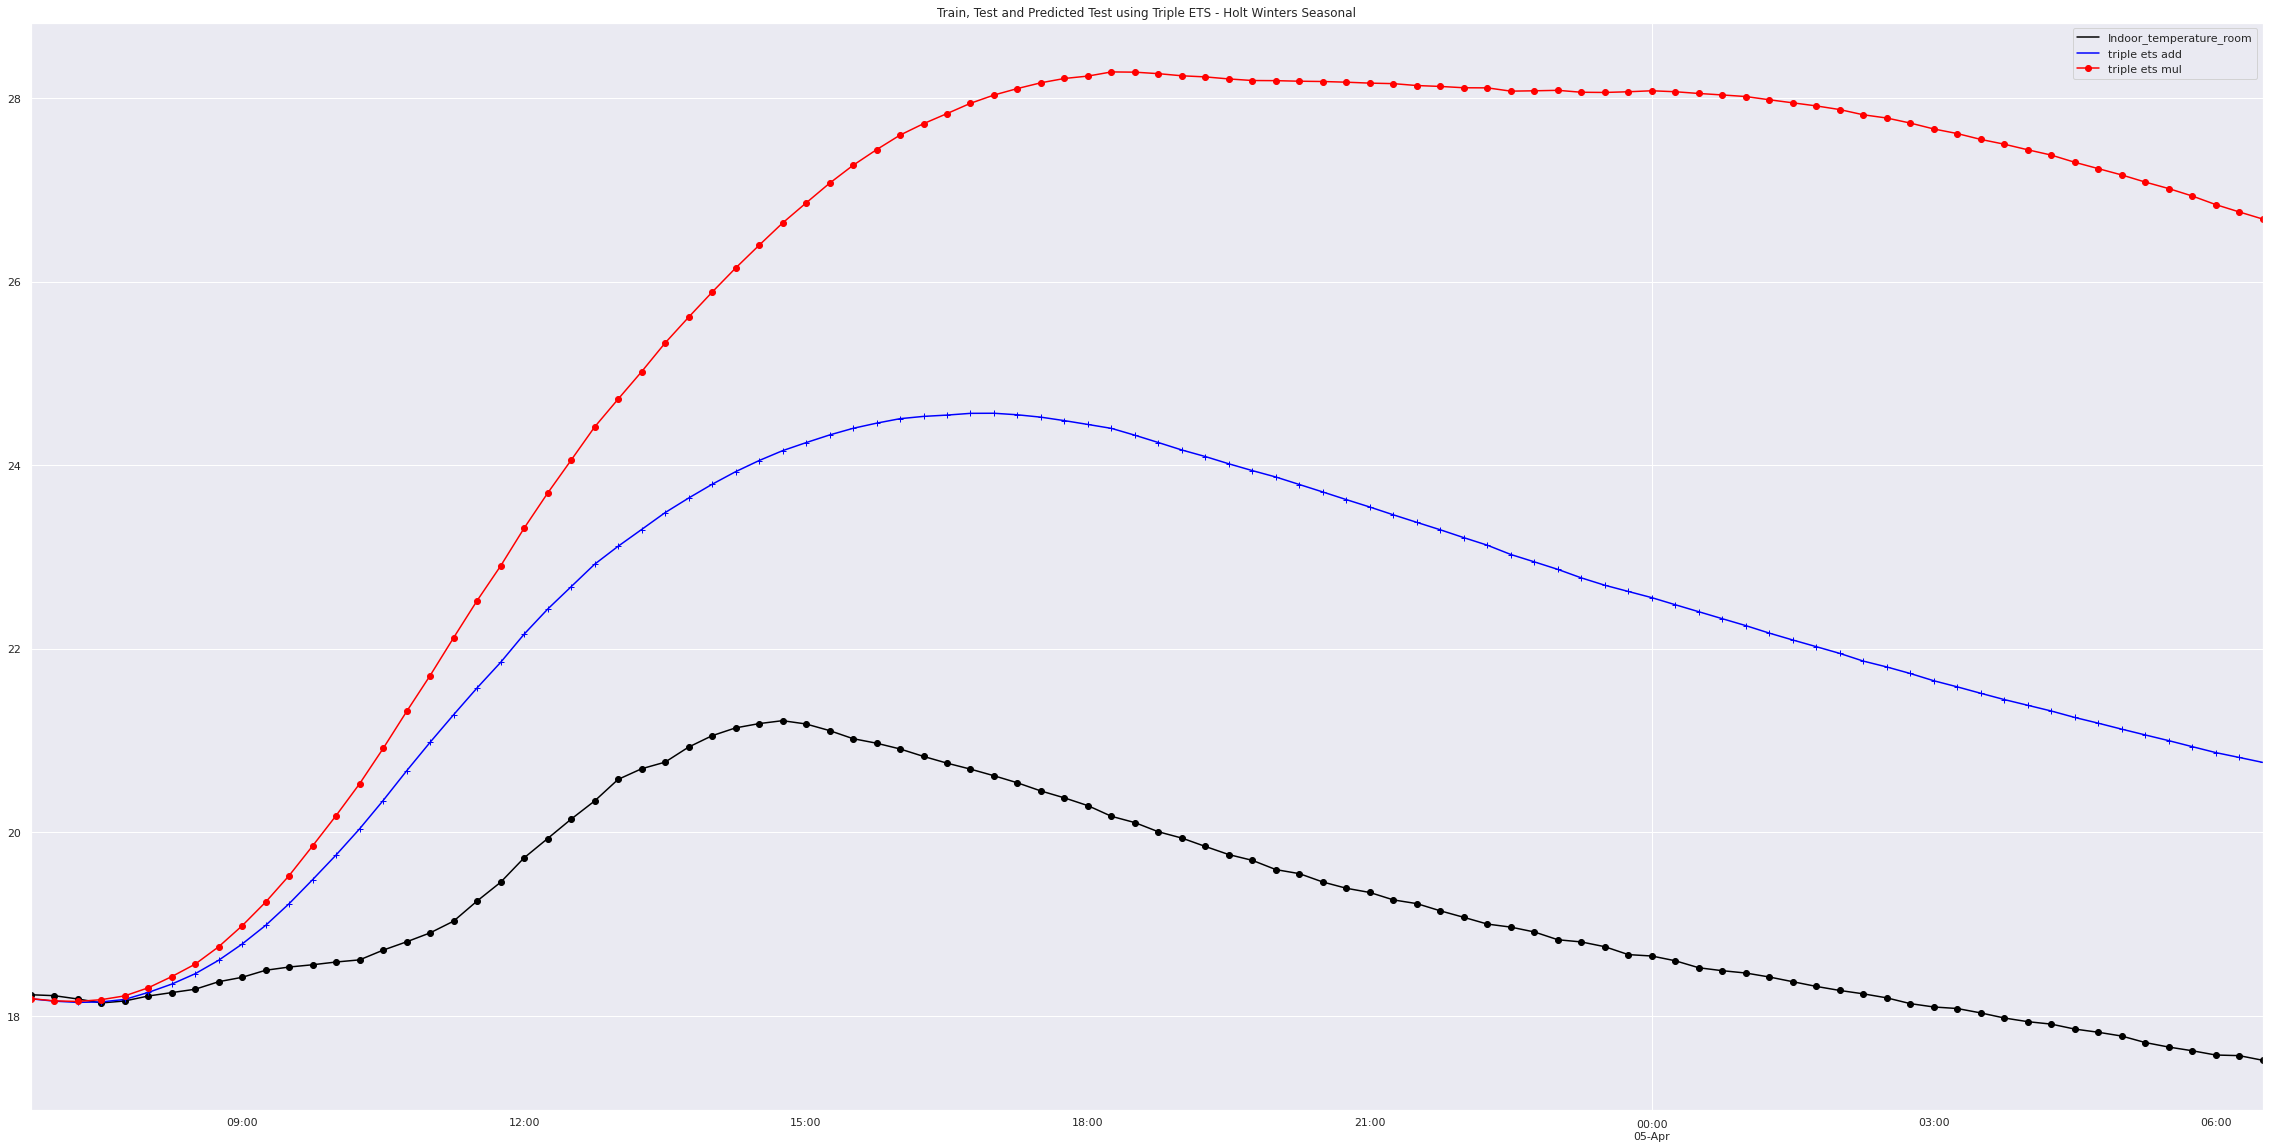

In [ ]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
#ax = train_data['O3 AQI'].plot(marker='o', color='black', figsize=(40,8), legend=True)
ax = y_test[0:96].plot(marker='o', color='black', figsize=(40,20), legend=True)

#y_train.plot(figsize=(20,8), legend=True)
#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
#triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
#triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(y_train.tail(191), start_p=0, start_q=0,
                         test='adf',
                         max_p=1, max_q=1, m=96,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=-209.064, Time=45.77 sec
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=-211.064, Time=6.76 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=-230.215, Time=62.66 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=-225.019, Time=32.47 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=-232.215, Time=2.90 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=-230.215, Time=29.05 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=-228.215, Time=27.81 sec
 ARIMA(1,1,1)(0,1,0)[96]             : AIC=-235.912, Time=12.24 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=-233.914, Time=105.92 sec
 ARIMA(1,1,1)(0,1,1)[96]             : AIC=-233.914, Time=67.20 sec
 ARIMA(1,1,1)(1,1,1)[96]             : AIC=-231.922, Time=87.07 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=-227.019, Time=8.87 sec
 ARIMA(1,1,1)(0,1,0)[96] intercept   : AIC=-234.253, Time=15.89 sec

Best model:  ARIMA(1,1,1)(0,1,0)[96]          
Total fit time: 504.724 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  191
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 96)   Log Likelihood                 120.956
Date:                             Wed, 12 Oct 2022   AIC                           -235.912
Time:                                     13:12:08   BIC                           -228.282
Sample:                                 04-02-2012   HQIC                          -232.830
                                      - 04-04-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9247      0.050     18.328      0.000       0.826       1.024
ma.L1         -0.7050      0.085     -8.338      0.000      -0.871      -0.539
sigma2         0.0044      0.000     11.082      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                72.37
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Please excuse us for only training the Auto ARIMA model on just the last 2 days of the dataset and using max_p=1, max_q=1. ARIMA is a very RAM demanding. Our free tier google colab notebook kept on crashing while the testing process. And we could not afford to pay for the paid tiers of google colab. 🥲

In [ ]:
sarima_pred = smodel.predict(672)
sarima_pred = pd.Series(sarima_pred, index =y_test[0:672].index)
sarima_pred

2012-04-04 06:45:00    18.214779
2012-04-04 07:00:00    18.210755
2012-04-04 07:15:00    18.203982
2012-04-04 07:30:00    18.221719
2012-04-04 07:45:00    18.227928
                         ...    
2012-04-11 05:30:00    19.245800
2012-04-11 05:45:00    19.229094
2012-04-11 06:00:00    19.181789
2012-04-11 06:15:00    19.142483
2012-04-11 06:30:00    19.075779
Length: 672, dtype: float64

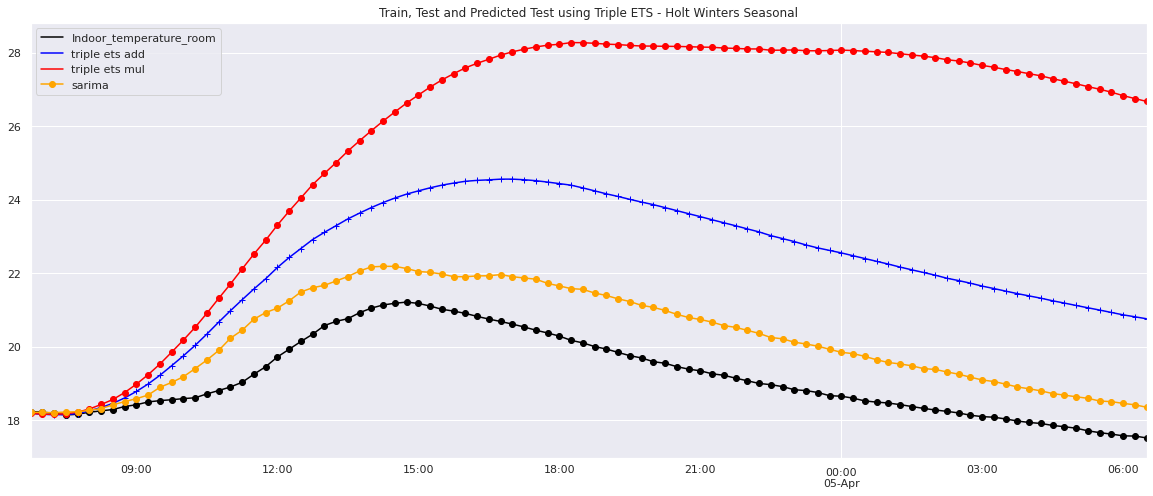

In [ ]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
#ax = train_data['O3 AQI'].plot(marker='o', color='black', figsize=(20,8), legend=True)
ax = y_test[0:96].plot(marker='o', color='black', figsize=(20,8), legend=True)

#train_data['O3 AQI'].plot(figsize=(20,8), legend=True)
#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')

sarima_pred[0:96].plot(marker='o', ax=ax, color='orange', legend=True, label = 'sarima')

plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

In [ ]:
var = VAR(train_data)
x= var.select_order()
x.summary()

No frequency information was provided, so inferred frequency 15T will be used.


<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
var_results = var.fit(16)
#We can check the summary of the model by.
var_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Oct, 2022
Time:                     13:12:11
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    23.6457
Nobs:                     2076.00    HQIC:                   21.4003
Log likelihood:          -46071.7    FPE:                5.38051e+08
AIC:                      20.1014    Det(Omega_mle):     2.93044e+08
--------------------------------------------------------------------
Results for equation CO2_room
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              16.180967         3.851422            4.201           0.000
L1.CO2_room                         1.421948         0.025559           55.634           0.000
L

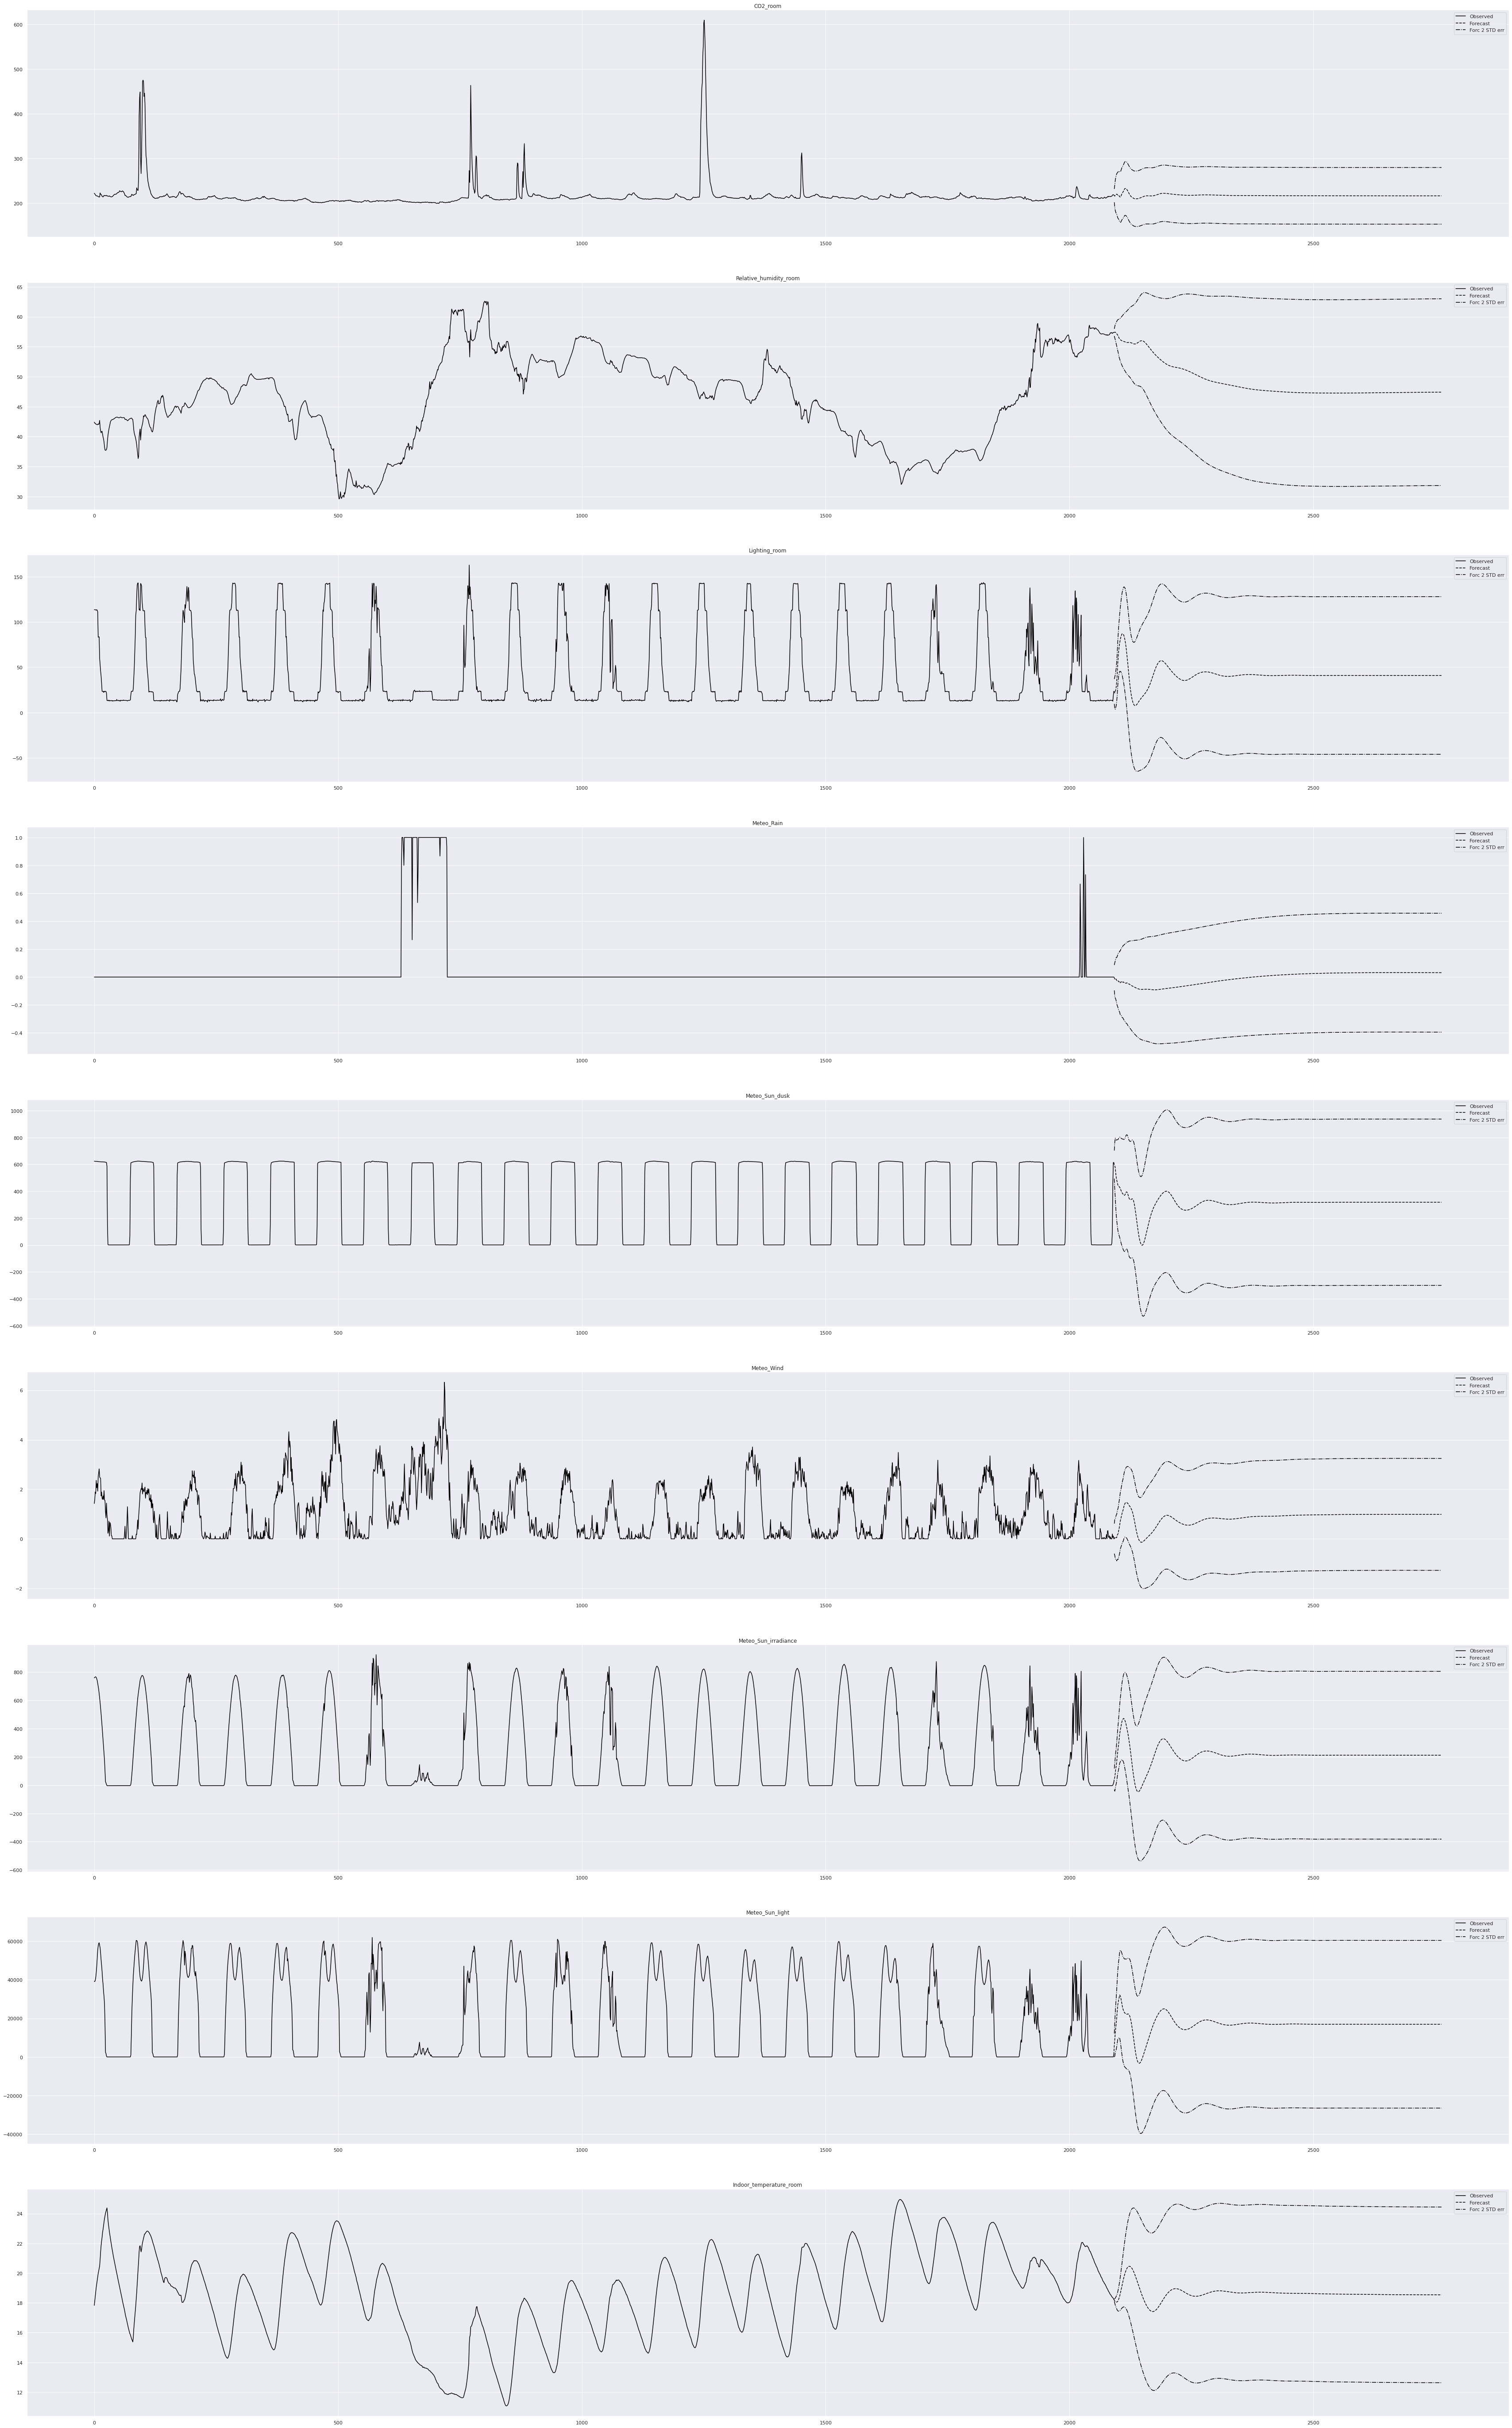

In [ ]:
fig = var_results.plot_forecast(672);
fig.set_size_inches(60, 100, forward=True)

In [ ]:
#predictions
var_pred = var_results.forecast(var_results.endog, steps=672)
var_pred

array([[  216.5203899 ,    57.38993097,    23.27802418, ...,
           42.74276223,  6044.81970493,    18.16937484],
       [  215.46547168,    57.42391745,    21.60152693, ...,
           56.61216152,  9235.63801492,    18.12093668],
       [  216.88547066,    57.43442434,    22.59414917, ...,
           84.89016719, 12553.27295769,    18.08285007],
       ...,
       [  216.04459177,    47.42346186,    40.94344328, ...,
          211.83243104, 16928.19126227,    18.53606253],
       [  216.04488635,    47.42409127,    40.94352811, ...,
          211.83285444, 16928.22179611,    18.53599992],
       [  216.04518054,    47.4247169 ,    40.94361767, ...,
          211.83330877, 16928.2547624 ,    18.535938  ]])

In [ ]:
#converting predictions to dataframe
var_pred = pd.DataFrame(index=test_data.index,columns=[test_data.columns], data = var_pred.round(2))
var_pred

CO2_room Relative_humidity_room Lighting_room Meteo_Rain  \
2012-04-04 06:45:00   216.52                  57.39         23.28      -0.00   
2012-04-04 07:00:00   215.47                  57.42         21.60      -0.02   
2012-04-04 07:15:00   216.89                  57.43         22.59      -0.02   
2012-04-04 07:30:00   218.40                  57.34         25.42      -0.01   
2012-04-04 07:45:00   219.23                  57.22         28.57      -0.02   
...                      ...                    ...           ...        ...   
2012-04-11 05:30:00   216.04                  47.42         40.94       0.03   
2012-04-11 05:45:00   216.04                  47.42         40.94       0.03   
2012-04-11 06:00:00   216.04                  47.42         40.94       0.03   
2012-04-11 06:15:00   216.04                  47.42         40.94       0.03   
2012-04-11 06:30:00   216.05                  47.42         40.94       0.03   

                    Meteo_Sun_dusk Meteo_Wind Meteo_Sun_irradiance  \
2012-04-04 06:45:00         598.39       0.01                42.74   
2012-04-04 07:00:00         589.59       0.06                56.61   
2012-04-04 07:15:00         574.16       0.02                84.89   
2012-04-04 07:30:00         533.22       0.02               116.48   
2012-04-04 07:45:00         501.68       0.06               136.00   
...                            ...        ...                  ...   
2012-04-11 05:30:00         318.57       0.99               211.83   
2012-04-11 05:45:00         318.57       0.99               211.83   
2012-04-11 06:00:00         318.57       0.99               211.83   
2012-04-11 06:15:00         318.57       0.99               211.83   
2012-04-11 06:30:00         318.57       0.99               211.83   

                    Meteo_Sun_light Indoor_temperature_room  
2012-04-04 06:45:00         6044.82                   18.17  
2012-04-04 07:00:00         9235.64                   18.12  
2012-04-04 07:15:00        12553.27                   18.08  
2012-04-04 07:30:00        15337.24                   18.06  
2012-04-04 07:45:00        17310.25                   18.05  
...                             ...                     ...  
2012-04-11 05:30:00        16928.14                   18.54  
2012-04-11 05:45:00        16928.16                   18.54  
2012-04-11 06:00:00        16928.19                   18.54  
2012-04-11 06:15:00        16928.22                   18.54  
2012-04-11 06:30:00        16928.25                   18.54  

[672 rows x 9 columns]

In [ ]:
var_prediction = var_pred['Indoor_temperature_room']
var_prediction.columns=['Vector Auto Regression']

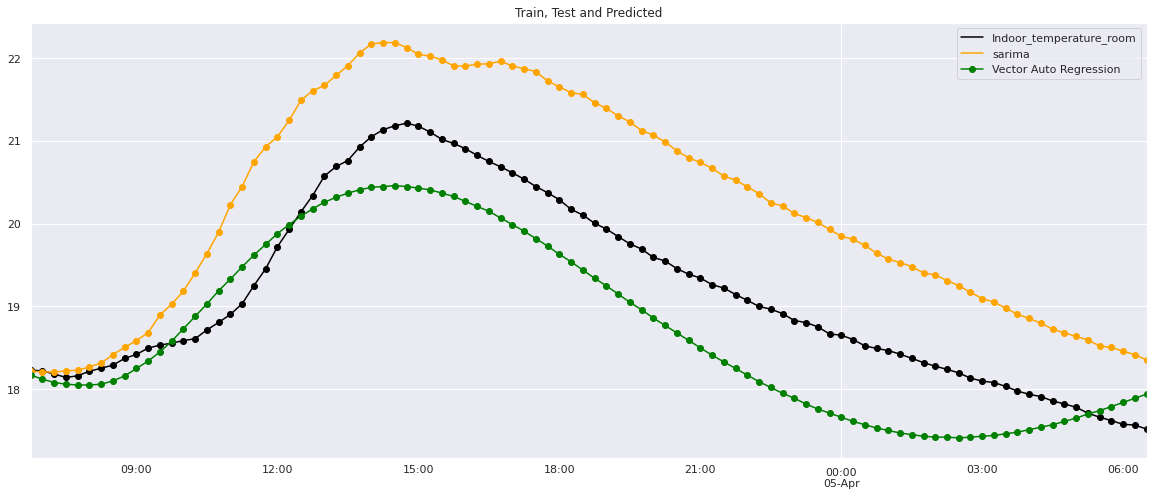

In [ ]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
#ax = train_data['O3 AQI'].plot(marker='o', color='black', figsize=(20,8), legend=True)
ax = y_test[0:96].plot(marker='o', color='black', figsize=(20,8), legend=True)

#train_data['O3 AQI'].plot(figsize=(20,8), legend=True)
#Plot for double ETS additive
#triple_ets_add_pred.plot(marker='o', ax=ax, color='blue', legend=True, label = 'triple ets add')

#Plot for double ETS multiplicative
#triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')

sarima_pred[0:96].plot(marker='o', ax=ax, color='orange', legend=True, label = 'sarima')

var_prediction[0:96].plot(marker='o', ax=ax, color='green', legend=True, label = 'var')

plt.title('Train, Test and Predicted')
plt.show()

In [ ]:
# SARIMAX Model
sxmodel = pm.auto_arima(y_train.tail(191), exogenous=x_train.tail(191),
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=1, max_q=1, m=96,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[96]             : AIC=-233.914, Time=67.03 sec
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=-211.064, Time=5.09 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=-230.215, Time=62.62 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=-225.019, Time=33.83 sec
 ARIMA(1,1,1)(0,1,0)[96]             : AIC=-235.912, Time=18.32 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=-233.914, Time=114.44 sec
 ARIMA(1,1,1)(1,1,1)[96]             : AIC=-231.922, Time=92.56 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=-227.019, Time=8.91 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=-232.215, Time=3.94 sec
 ARIMA(1,1,1)(0,1,0)[96] intercept   : AIC=-234.253, Time=198.02 sec

Best model:  ARIMA(1,1,1)(0,1,0)[96]          
Total fit time: 604.849 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  191
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 96)   Log Likelihood                 120.956
Date:                             Wed, 12 Oct 2022   AIC                           -235.912
Time:                                     13:22:23   BIC                           -228.282
Sample:                                 04-02-2012   HQIC                          -232.830
                                      - 04-04-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9247      0.050     18.328      0.000       0.826       1.024
ma.L1         -0.7050      0.085     -8.338      0.000      -0.871      -0.539
sigma2         0.0044      0.000     11.082      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                72.37
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Again, we had the same problem with the SARIMAX as we encounter the Auto ARIMA. SARIMAX is also RAM intensive and would crash the google colab runtime everytime we tried to run it with large amount of data. Hence we have opted for only last 2 days of data along with max_p=1, max_q=1.

In [ ]:
sarimax_pred = sxmodel.predict(n_periods=672, exogenous=y_test)
#converting predictions to dataframe
sarimax_pred = pd.DataFrame(index=test_data.index,columns=['Indoor_temperature_room'], data = sarimax_pred.round(2))
sarimax_pred


Indoor_temperature_room
2012-04-04 06:45:00                    18.21
2012-04-04 07:00:00                    18.21
2012-04-04 07:15:00                    18.20
2012-04-04 07:30:00                    18.22
2012-04-04 07:45:00                    18.23
...                                      ...
2012-04-11 05:30:00                    19.25
2012-04-11 05:45:00                    19.23
2012-04-11 06:00:00                    19.18
2012-04-11 06:15:00                    19.14
2012-04-11 06:30:00                    19.08

[672 rows x 1 columns]

In [ ]:
sarimax_prediction=sarimax_pred
sarimax_prediction.columns=['SARIMAX']

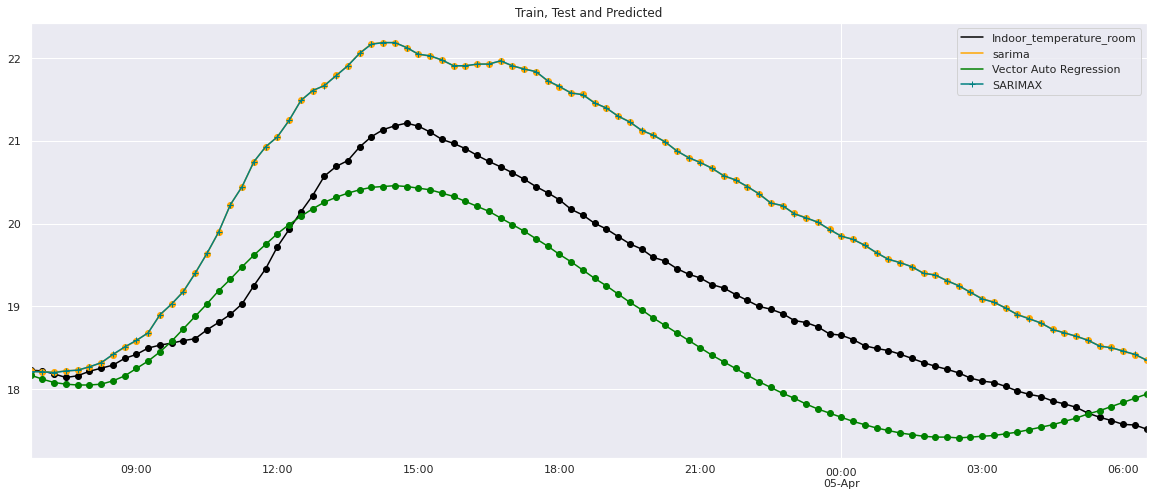

In [ ]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
#ax = train_data['O3 AQI'].plot(marker='o', color='black', figsize=(20,8), legend=True)
ax = y_test[0:96].plot(marker='o', color='black', figsize=(20,8), legend=True)

#train_data['O3 AQI'].plot(figsize=(20,8), legend=True)
#Plot for double ETS additive
#triple_ets_add_pred.plot(marker='o', ax=ax, color='blue', legend=True, label = 'triple ets add')

#Plot for double ETS multiplicative
#triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')

sarima_pred[0:96].plot(marker='o', ax=ax, color='orange', legend=True, label = 'sarima')

var_prediction[0:96].plot(marker='o', ax=ax, color='green', legend=True, label = 'Vector AutoRegression')

sarimax_prediction[0:96].plot(marker='+', ax=ax, color='teal', legend=True, label = 'sarimax')

plt.title('Train, Test and Predicted')
plt.show()

In [ ]:
#define metrics dataframe which will be used below for
metrics_dataframe = pd.DataFrame(columns=['Model', 'R2', 'RMSE', 'MAE', 'MAPE'])


def metrics_cal(actuals, predictions, model):
    print()
    r2 = metrics.r2_score(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    df = pd.DataFrame({'Model': model,
                       'R2': r2,
                       'RMSE': rmse,
                       'MAE': mae,
                       'MAPE': mape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [ ]:
#get all the metrics
metrics_dataframe = metrics_cal(y_test[0:96].values.flatten(),
                                triple_ets_add_pred[0:96].values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(y_test[0:96].values.flatten(),
                                triple_ets_mul_pred[0:96].values.flatten(),
                                'Triple Mul')

metrics_dataframe = metrics_cal(y_test[0:96].values.flatten(),
                                sarima_pred[0:96].values.flatten(),
                                'SARIMA')

metrics_dataframe = metrics_cal(y_test[0:96].values.flatten(),
                                var_pred['Indoor_temperature_room'][0:96].values.flatten(),
                                'VAR')

metrics_dataframe = metrics_cal(y_test[0:96].values.flatten(),
                                sarimax_pred[0:96].values.flatten(),
                                'SARIMAX')


In [ ]:
metrics_dataframe.sort_values(by="MAE", ascending=True)

Model         R2      RMSE       MAE       MAPE
0         VAR   0.673846  0.623797  0.545445   2.832033
0     SARIMAX  -0.020884  1.103621  1.025236   5.312474
0      SARIMA  -0.021428  1.103915  1.025392   5.313334
0  Triple Add  -8.056781  3.287142  3.021070  15.712830
0  Triple Mul -43.911280  7.319969  6.537452  34.295356

## Multivariate ML Forecasting

In [ ]:
data_grouped=data_dropped.groupby(pd.Grouper(freq='H')).mean().round(2)

In [ ]:
data_grouped

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  
2012-03-13 11:00:00                    17.83  
2012-03-13 12:00:00                    18.59  
2012-03-13 13:00:00                    19.63  
2012-03-13 14:00:00                    20.46  
2012-03-13 15:00:00                    21.96  
...                                      ...  
2012-04-11 02:00:00                    22.02  
2012-04-11 03:00:00                    21.65  
2012-04-11 04:00:00                    21.26  
2012-04-11 05:00:00                    20.86  
2012-04-11 06:00:00                    20.51  

[692 rows x 9 columns]

In [ ]:
# create lagged values

# create past 3 hours' lagged values for all the columns

lagged_train_data = data_grouped.copy()
trailing_window_size = 3

for window in range(1, trailing_window_size + 1):
    shifted = data_grouped.shift(window)
    shifted.columns = [x + "_lag-" + str(window) for x in train_data.columns]
    lagged_train_data = pd.concat((lagged_train_data, shifted), axis=1)

lagged_train_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 11:00:00                    17.83             NaN  ...   
2012-03-13 12:00:00                    18.59          221.92  ...   
2012-03-13 13:00:00                    19.63          218.11  ...   
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
...                                      ...             ...  ...   
2012-04-11 02:00:00                    22.02          191.89  ...   
2012-04-11 03:00:00                    21.65          191.94  ...   
2012-04-11 04:00:00                    21.26          191.48  ...   
2012-04-11 05:00:00                    20.86          191.59  ...   
2012-04-11 06:00:00                    20.51          192.32  ...   

                     Indoor_temperature_room_lag-2  CO2_room_lag-3  \
2012-03-13 11:00:00                            NaN             NaN   
2012-03-13 12:00:00                            NaN             NaN   
2012-03-13 13:00:00                          17.83             NaN   
2012-03-13 14:00:00                          18.59          221.92   
2012-03-13 15:00:00                          19.63          218.11   
...                                            ...             ...   
2012-04-11 02:00:00                          22.72          192.15   
2012-04-11 03:00:00                          22.36          191.69   
2012-04-11 04:00:00                          22.02          191.89   
2012-04-11 05:00:00                          21.65          191.94   
2012-04-11 06:00:00                          21.26     

In [ ]:
lagged_train_data = lagged_train_data.dropna()
lagged_train_data.head()

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
2012-03-13 16:00:00    214.99                   39.75          23.14   
2012-03-13 17:00:00    216.60                   37.89          23.21   
2012-03-13 18:00:00    216.07                   38.89          15.37   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
2012-03-13 16:00:00         0.0          618.39        1.72   
2012-03-13 17:00:00         0.0          616.55        1.26   
2012-03-13 18:00:00         0.0          339.01        0.86   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
2012-03-13 16:00:00                295.88         35823.22   
2012-03-13 17:00:00                 78.83         12136.30   
2012-03-13 18:00:00                 -1.39           127.83   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
2012-03-13 16:00:00                    23.08          217.92  ...   
2012-03-13 17:00:00                    23.92          214.99  ...   
2012-03-13 18:00:00                    24.08          216.60  ...   

                     Indoor_temperature_room_lag-2  CO2_room_lag-3  \
2012-03-13 14:00:00                          18.59          221.92   
2012-03-13 15:00:00                          19.63          218.11   
2012-03-13 16:00:00                          20.46          215.42   
2012-03-13 17:00:00                          21.96          215.87   
2012-03-13 18:00:00                          23.08          217.92   

                     Relative_humidity_room_lag-3  Lighting_room_lag-3  \
2012-03-13 14:00:00                         42.42               113.52   
2012-03-13 15:00:00                         42.16               113.40   
2012-03-13 16:00:00                         42.04               105.30   
2012-03-13 17:00:00                         42.11                69.94   
2012-03-13 18:00:00                         40.83                35.38   

                     Meteo_Rain_lag-3  Meteo_Sun_dusk_lag-3  Meteo_Wind_lag-3  \
2012-03-13 14:00:00               0.0                623.36              1.43   
2012-03-13 15:00:00               0.0                622.71              1.92   
2012-03-13 16:00:00               0.0                621.81              2.18   
2012-03-13 17:00:00               0.0                619.78              2.61   
2012-03-13 18:00:00               0.0                619.00              1.92   

                     Meteo_Sun_irradiance_lag-3  Meteo_Sun_light_lag-3  \
2012-03-13 14:00:00                      758.88               39243.75   
2012-03-13 15:00:00                      764.28               40892.22   
2012-03-13 16:00:00                      728.53               52667.71   
2012-03-13 17:00:00                      631.16               58077.94   
2012-03-13 18:00:00                      481.14               48938.29   

                     Indoor_temperature_room_lag-3  
2012-03-13 14:00:00                          17.83  
2012-03-13 15:00:00                          18.59  
2012-03-13 16:00:00                          19.63  
2012-03-13 17:00:00                          20.46  
2012-03-13 18:00:00                          21.96  

[5 rows x 36 columns]

In [ ]:
lagged_train_data.columns

Index(['CO2_room', 'Relative_humidity_room', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_irradiance',
       'Meteo_Sun_light', 'Indoor_temperature_room', 'CO2_room_lag-1',
       'Relative_humidity_room_lag-1', 'Lighting_room_lag-1',
       'Meteo_Rain_lag-1', 'Meteo_Sun_dusk_lag-1', 'Meteo_Wind_lag-1',
       'Meteo_Sun_irradiance_lag-1', 'Meteo_Sun_light_lag-1',
       'Indoor_temperature_room_lag-1', 'CO2_room_lag-2',
       'Relative_humidity_room_lag-2', 'Lighting_room_lag-2',
       'Meteo_Rain_lag-2', 'Meteo_Sun_dusk_lag-2', 'Meteo_Wind_lag-2',
       'Meteo_Sun_irradiance_lag-2', 'Meteo_Sun_light_lag-2',
       'Indoor_temperature_room_lag-2', 'CO2_room_lag-3',
       'Relative_humidity_room_lag-3', 'Lighting_room_lag-3',
       'Meteo_Rain_lag-3', 'Meteo_Sun_dusk_lag-3', 'Meteo_Wind_lag-3',
       'Meteo_Sun_irradiance_lag-3', 'Meteo_Sun_light_lag-3',
       'Indoor_temperature_room_lag-3'],
      dtype='object')

In [ ]:
#create trend, seasonality, and error (ETS)

def create_trend_seasonality_error(data):
    cols = ['CO2_room', 'Relative_humidity_room', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_irradiance',
       'Meteo_Sun_light', 'Indoor_temperature_room']
    for col in cols:
        #print(col)
        res = sm.tsa.seasonal_decompose(data[col], extrapolate_trend='freq')
        # extract the decomposed terms
        data[col+'_trend'] = res.trend
        data[col+'_seasonal'] = res.seasonal
        data[col+'_error'] = res.resid
    return data

In [ ]:
ets_train_data = create_trend_seasonality_error(lagged_train_data.copy())

In [ ]:
ets_train_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
2012-03-13 16:00:00    214.99                   39.75          23.14   
2012-03-13 17:00:00    216.60                   37.89          23.21   
2012-03-13 18:00:00    216.07                   38.89          15.37   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
2012-03-13 16:00:00         0.0          618.39        1.72   
2012-03-13 17:00:00         0.0          616.55        1.26   
2012-03-13 18:00:00         0.0          339.01        0.86   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
2012-03-13 16:00:00                295.88         35823.22   
2012-03-13 17:00:00                 78.83         12136.30   
2012-03-13 18:00:00                 -1.39           127.83   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
2012-03-13 16:00:00                    23.08          217.92  ...   
2012-03-13 17:00:00                    23.92          214.99  ...   
2012-03-13 18:00:00                    24.08          216.60  ...   
...                                      ...             ...  ...   
2012-04-11 02:00:00                    22.02          191.89  ...   
2012-04-11 03:00:00                    21.65          191.94  ...   
2012-04-11 04:00:00                    21.26          191.48  ...   
2012-04-11 05:00:00                    20.86          191.59  ...   
2012-04-11 06:00:00                    20.51          192.32  ...   

                     Meteo_Wind_error  Meteo_Sun_irradiance_trend  \
2012-03-13 14:00:00          0.372716                  223.440148   
2012-03-13 15:00:00         -0.086267                  223.521370   
2012-03-13 16:00:00         -0.029173                  223.602592   
2012-03-13 17:00:00         -0.015878                  223.683815   
2012-03-13 18:00:00          0.246504                  223.765037   
...                               ...                         ...   
2012-04-11 02:00:00         -1.191886                  223.861604   
2012-04-11 03:00:00         -1.366882                  223.263520   
2012-04-11 04:00:00         -1.855528                  222.665437   
2012-04-11 05:00:00         -1.970058                  222.067353   
2012-04-11 06:00:00         -1.873150                  221.469269 

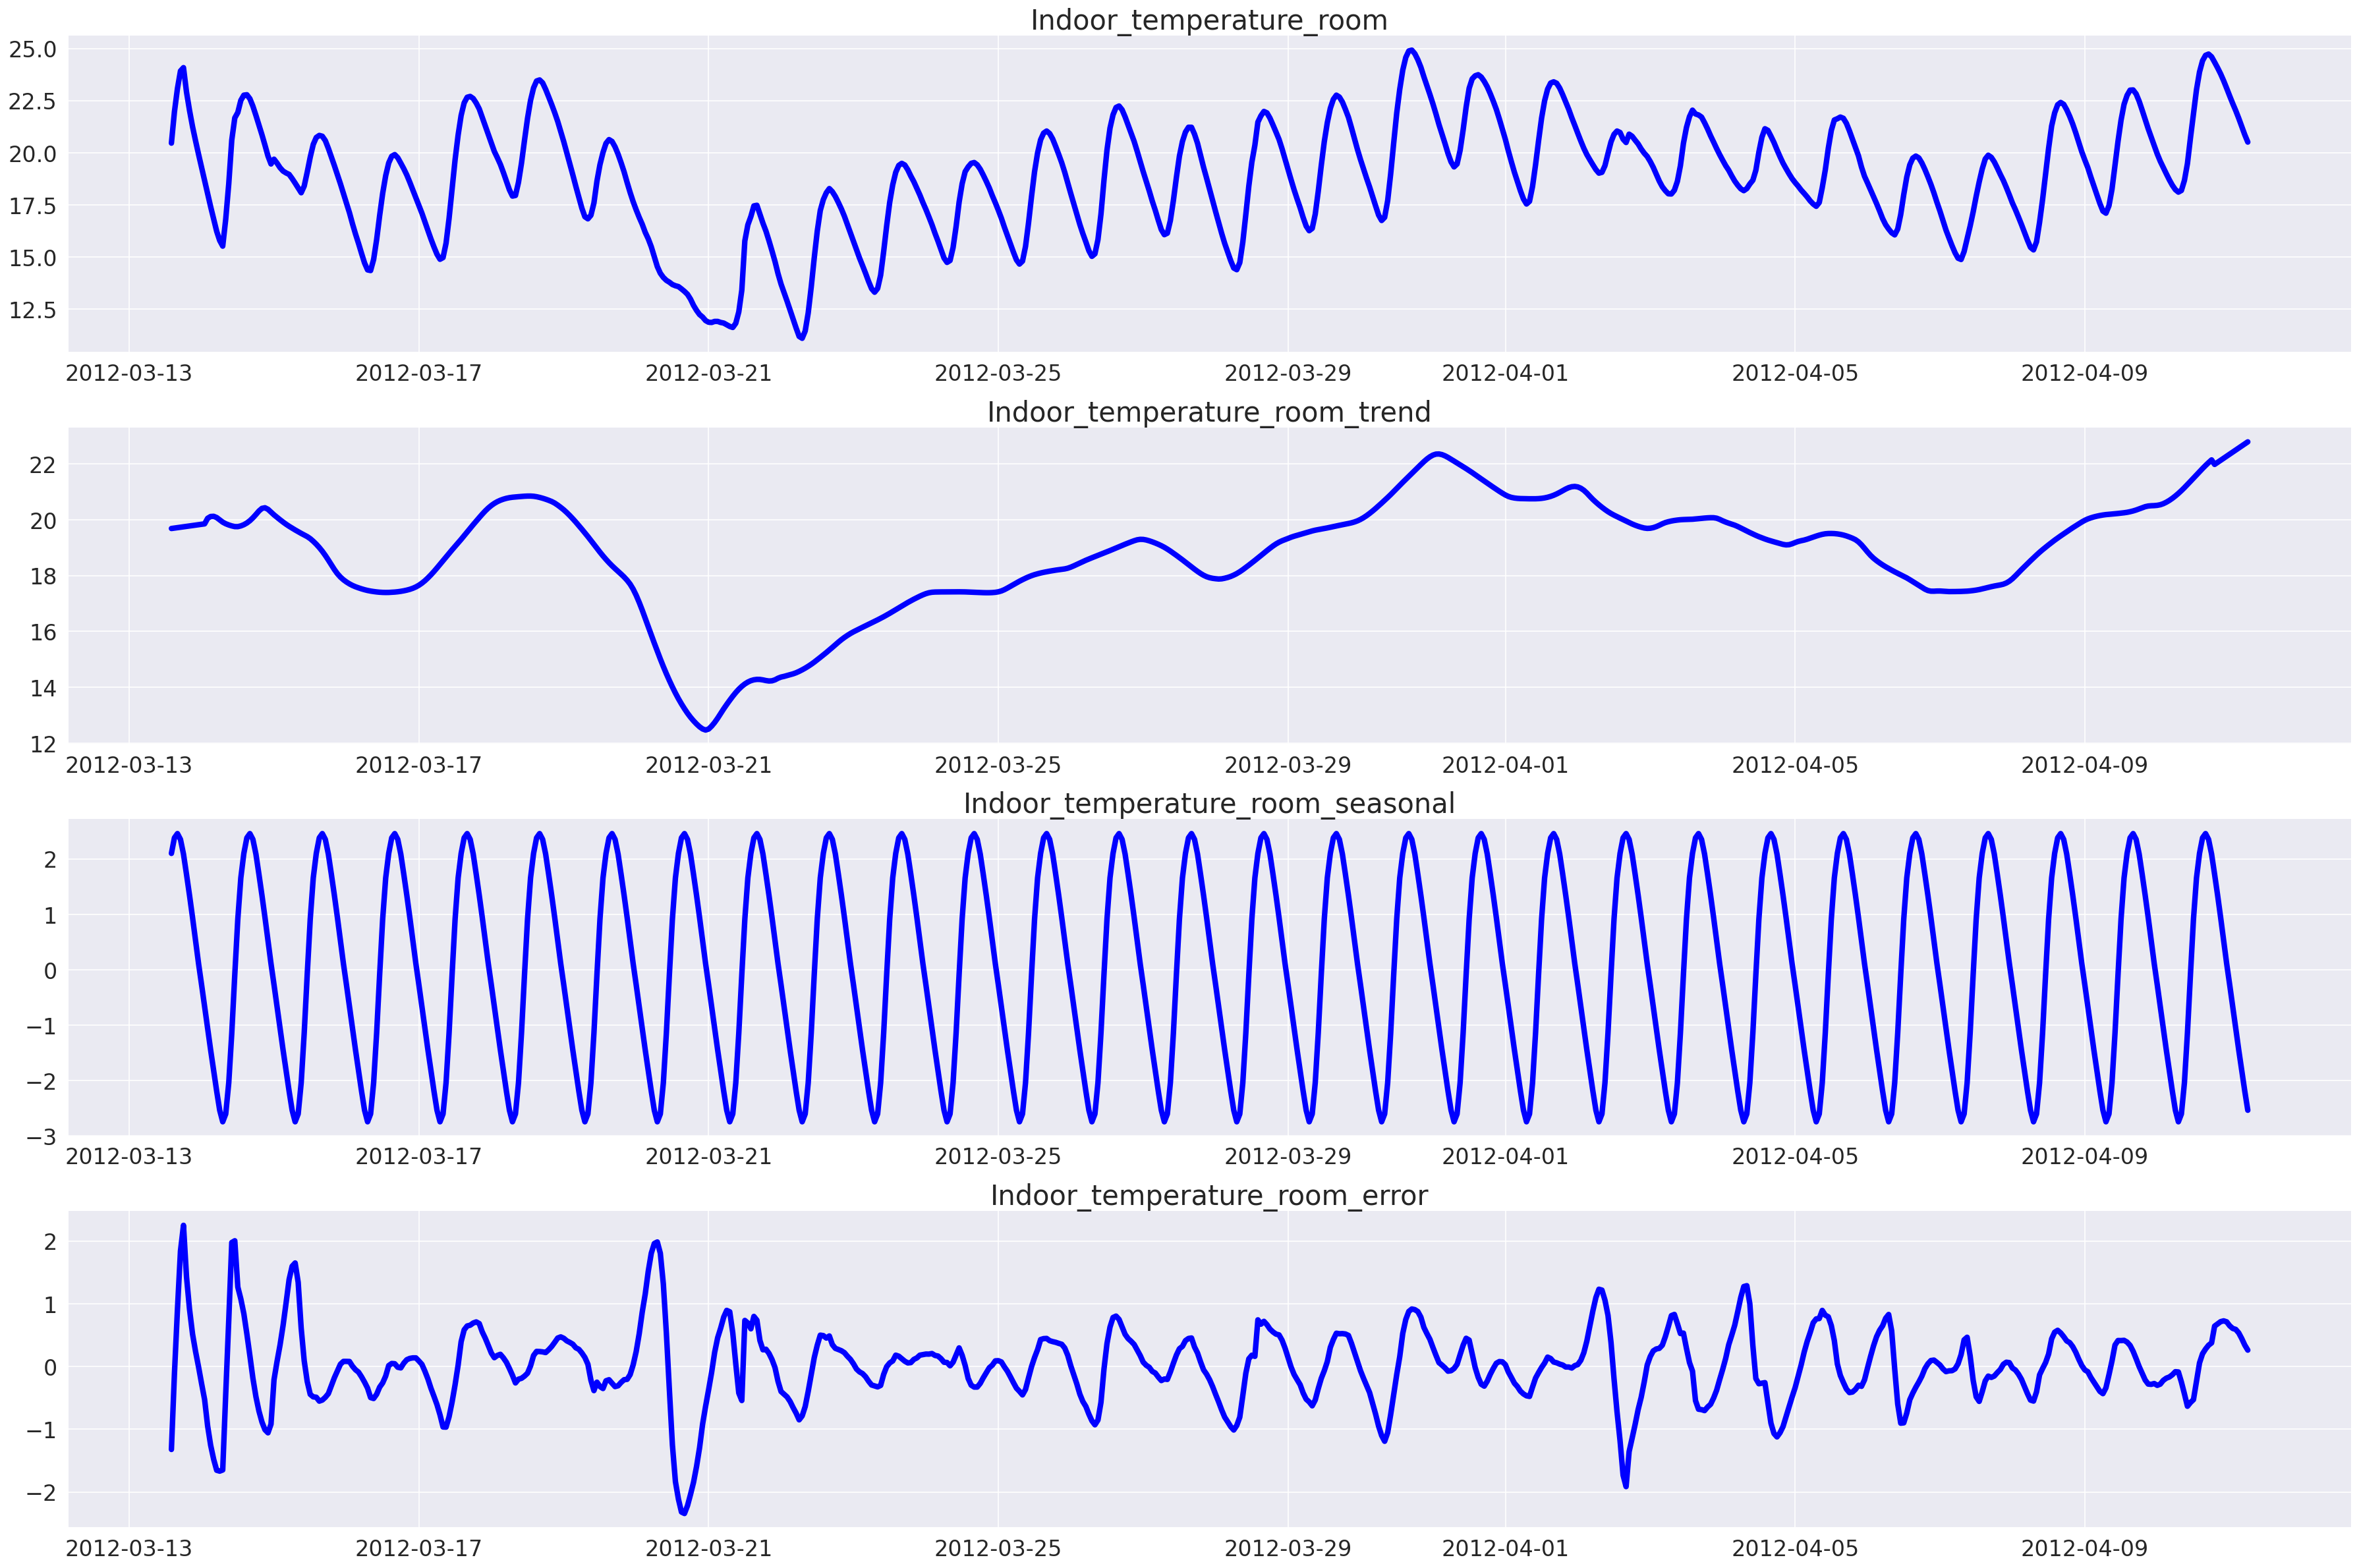

In [ ]:
# Plot decomposition
o3_ets = ets_train_data[['Indoor_temperature_room', 'Indoor_temperature_room_trend', 'Indoor_temperature_room_seasonal', 'Indoor_temperature_room_error']]

fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(30,20))
for i, ax in enumerate(axes.flatten()):
    data = o3_ets[o3_ets.columns[i]]
    ax.plot(data, color='blue', linewidth=5)
    # Decorations
    ax.set_title(o3_ets.columns[i], fontsize=25)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=20)

plt.tight_layout();

In [ ]:
ets_train_data['avg_Indoor_temperature_room_next_12'] = ets_train_data['Indoor_temperature_room'].rolling(12).mean().shift(-12)

In [ ]:
# add dummy variables for hour

ets_train_data['Hour'] = ets_train_data.index.hour
# display the dataframe
ets_train_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
2012-03-13 16:00:00    214.99                   39.75          23.14   
2012-03-13 17:00:00    216.60                   37.89          23.21   
2012-03-13 18:00:00    216.07                   38.89          15.37   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
2012-03-13 16:00:00         0.0          618.39        1.72   
2012-03-13 17:00:00         0.0          616.55        1.26   
2012-03-13 18:00:00         0.0          339.01        0.86   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
2012-03-13 16:00:00                295.88         35823.22   
2012-03-13 17:00:00                 78.83         12136.30   
2012-03-13 18:00:00                 -1.39           127.83   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
2012-03-13 16:00:00                    23.08          217.92  ...   
2012-03-13 17:00:00                    23.92          214.99  ...   
2012-03-13 18:00:00                    24.08          216.60  ...   
...                                      ...             ...  ...   
2012-04-11 02:00:00                    22.02          191.89  ...   
2012-04-11 03:00:00                    21.65          191.94  ...   
2012-04-11 04:00:00                    21.26          191.48  ...   
2012-04-11 05:00:00                    20.86          191.59  ...   
2012-04-11 06:00:00                    20.51          192.32  ...   

                     Meteo_Sun_irradiance_seasonal  \
2012-03-13 14:00:00                     364.331242   
2012-03-13 15:00:00                     225.801630   
2012-03-13 16:00:00                      71.842623   
2012-03-13 17:00:00                    -120.907807   
2012-03-13 18:00:00                    -214.084243   
...                                            ...   
2012-04-11 02:00:00                    -219.696740   
2012-04-11 03:00:00                    -219.774514   
2012-04-11 04:00:00                    -219.847001   
2012-04-11 05:00:00                    -219.632994   
2012-04-11 06:00:00                    -182.519339   

                     Meteo_Sun_irradiance_error  Meteo_Sun_light_trend  \
2012-03-13 14:00:00                   43.388611           20428.850523   
2012-03-13 15:00:00         

In [ ]:
ets_train_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
2012-03-13 16:00:00    214.99                   39.75          23.14   
2012-03-13 17:00:00    216.60                   37.89          23.21   
2012-03-13 18:00:00    216.07                   38.89          15.37   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
2012-03-13 16:00:00         0.0          618.39        1.72   
2012-03-13 17:00:00         0.0          616.55        1.26   
2012-03-13 18:00:00         0.0          339.01        0.86   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
2012-03-13 16:00:00                295.88         35823.22   
2012-03-13 17:00:00                 78.83         12136.30   
2012-03-13 18:00:00                 -1.39           127.83   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
2012-03-13 16:00:00                    23.08          217.92  ...   
2012-03-13 17:00:00                    23.92          214.99  ...   
2012-03-13 18:00:00                    24.08          216.60  ...   
...                                      ...             ...  ...   
2012-04-11 02:00:00                    22.02          191.89  ...   
2012-04-11 03:00:00                    21.65          191.94  ...   
2012-04-11 04:00:00                    21.26          191.48  ...   
2012-04-11 05:00:00                    20.86          191.59  ...   
2012-04-11 06:00:00                    20.51          192.32  ...   

                     Meteo_Sun_irradiance_seasonal  \
2012-03-13 14:00:00                     364.331242   
2012-03-13 15:00:00                     225.801630   
2012-03-13 16:00:00                      71.842623   
2012-03-13 17:00:00                    -120.907807   
2012-03-13 18:00:00                    -214.084243   
...                                            ...   
2012-04-11 02:00:00                    -219.696740   
2012-04-11 03:00:00                    -219.774514   
2012-04-11 04:00:00                    -219.847001   
2012-04-11 05:00:00                    -219.632994   
2012-04-11 06:00:00                    -182.519339   

                     Meteo_Sun_irradiance_error  Meteo_Sun_light_trend  \
2012-03-13 14:00:00                   43.388611           20428.850523   
2012-03-13 15:00:00         

In [ ]:
ets_train_data.tail(25)

CO2_room  Relative_humidity_room  Lighting_room  \
2012-04-10 06:00:00    205.55                   52.00          21.39   
2012-04-10 07:00:00    204.59                   52.11          23.92   
2012-04-10 08:00:00    202.65                   52.14          45.56   
2012-04-10 09:00:00    199.93                   50.83          86.69   
2012-04-10 10:00:00    198.17                   50.25         120.37   
2012-04-10 11:00:00    194.34                   49.27         102.08   
2012-04-10 12:00:00    193.52                   47.88         129.57   
2012-04-10 13:00:00    193.24                   46.25         100.48   
2012-04-10 14:00:00    193.10                   43.93          67.09   
2012-04-10 15:00:00    193.22                   41.86          39.28   
2012-04-10 16:00:00    193.12                   39.62          24.26   
2012-04-10 17:00:00    192.85                   38.80          22.81   
2012-04-10 18:00:00    192.18                   38.86          19.81   
2012-04-10 19:00:00    192.46                   38.68          12.94   
2012-04-10 20:00:00    192.23                   38.52          12.87   
2012-04-10 21:00:00    192.25                   38.83          12.85   
2012-04-10 22:00:00    192.36                   39.59          12.96   
2012-04-10 23:00:00    192.15                   40.25          12.96   
2012-04-11 00:00:00    191.69                   40.68          12.87   
2012-04-11 01:00:00    191.89                   40.89          13.05   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-04-10 06:00:00         0.0          613.54        0.07   
2012-04-10 07:00:00         0.0          615.29        0.21   
2012-04-10 08:00:00         0.0          617.05        0.75   
2012-04-10 09:00:00         0.0          620.01        0.96   
2012-04-10 10:00:00         0.0          622.20        2.49   
2012-04-10 11:00:00         0.0          621.99        3.96   
2012-04-10 12:00:00         0.0          622.71        4.45   
2012-04-10 13:00:00         0.0          622.26        4.67   
2012-04-10 14:00:00         0.0          621.56        4.60   
2012-04-10 15:00:00         0.0          620.61        4.35   
2012-04-10 16:00:00         0.0          619.74        4.39   
2012-04-10 17:00:00         0.0          618.34        4.14   
2012-04-10 18:00:00         0.0          576.93        3.61   
2012-04-10 19:00:00         0.0           14.70        3.47   
2012-04-10 20:00:00         0.0            0.92        2.63   
2012-04-10 21:00:00         0.0            0.66        1.70   
2012-04-10 22:00:00         0.0            0.65        1.37   
2012-04-10 23:00:00         0.0            0.65        1.86   
2012-04-11 00:00:00         0.0            0.68        1.70   
2012-04-11 01:00:00         0.0            0.74        0.52   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-04-10 06:00:00                 21.79          1228.71   
2012-04-10 07:00:00                117.75          7267.44   
2012-04-10 08:00:00                249.78         16128.52   
2012-04-10 09:00:00                429.46         29817.17   
2012-04-10 10:00:00                640.34         39684.05   
2012-04-10 11:00:00                657.45         32256.32   
2012-04-10 12:00:00                926.19         35225.20   
2012-04-10 13

In [ ]:
ets_train_data = ets_train_data.dropna()
ets_train_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
2012-03-13 16:00:00    214.99                   39.75          23.14   
2012-03-13 17:00:00    216.60                   37.89          23.21   
2012-03-13 18:00:00    216.07                   38.89          15.37   
...                       ...                     ...            ...   
2012-04-10 14:00:00    193.10                   43.93          67.09   
2012-04-10 15:00:00    193.22                   41.86          39.28   
2012-04-10 16:00:00    193.12                   39.62          24.26   
2012-04-10 17:00:00    192.85                   38.80          22.81   
2012-04-10 18:00:00    192.18                   38.86          19.81   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
2012-03-13 16:00:00         0.0          618.39        1.72   
2012-03-13 17:00:00         0.0          616.55        1.26   
2012-03-13 18:00:00         0.0          339.01        0.86   
...                         ...             ...         ...   
2012-04-10 14:00:00         0.0          621.56        4.60   
2012-04-10 15:00:00         0.0          620.61        4.35   
2012-04-10 16:00:00         0.0          619.74        4.39   
2012-04-10 17:00:00         0.0          618.34        4.14   
2012-04-10 18:00:00         0.0          576.93        3.61   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
2012-03-13 16:00:00                295.88         35823.22   
2012-03-13 17:00:00                 78.83         12136.30   
2012-03-13 18:00:00                 -1.39           127.83   
...                                   ...              ...   
2012-04-10 14:00:00                725.93         43401.96   
2012-04-10 15:00:00                543.50         36165.33   
2012-04-10 16:00:00                390.97         32272.98   
2012-04-10 17:00:00                147.99         15791.70   
2012-04-10 18:00:00                  9.71           958.72   

                     Indoor_temperature_room  CO2_room_lag-1  ...  \
2012-03-13 14:00:00                    20.46          215.42  ...   
2012-03-13 15:00:00                    21.96          215.87  ...   
2012-03-13 16:00:00                    23.08          217.92  ...   
2012-03-13 17:00:00                    23.92          214.99  ...   
2012-03-13 18:00:00                    24.08          216.60  ...   
...                                      ...             ...  ...   
2012-04-10 14:00:00                    23.87          193.24  ...   
2012-04-10 15:00:00                    24.41          193.10  ...   
2012-04-10 16:00:00                    24.67          193.22  ...   
2012-04-10 17:00:00                    24.73          193.12  ...   
2012-04-10 18:00:00                    24.60          192.85  ...   

                     Meteo_Sun_irradiance_seasonal  \
2012-03-13 14:00:00                     364.331242   
2012-03-13 15:00:00                     225.801630   
2012-03-13 16:00:00                      71.842623   
2012-03-13 17:00:00                    -120.907807   
2012-03-13 18:00:00                    -214.084243   
...                                            ...   
2012-04-10 14:00:00                     364.331242   
2012-04-10 15:00:00                     225.801630   
2012-04-10 16:00:00                      71.842623   
2012-04-10 17:00:00                    -120.907807   
2012-04-10 18:00:00                    -214.084243   

                     Meteo_Sun_irradiance_error  Meteo_Sun_light_trend  \
2012-03-13 14:00:00                   43.388611           20428.850523   
2012-03-13 15:00:00         

In [ ]:
ets_train_data.columns

Index(['CO2_room', 'Relative_humidity_room', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_irradiance',
       'Meteo_Sun_light', 'Indoor_temperature_room', 'CO2_room_lag-1',
       'Relative_humidity_room_lag-1', 'Lighting_room_lag-1',
       'Meteo_Rain_lag-1', 'Meteo_Sun_dusk_lag-1', 'Meteo_Wind_lag-1',
       'Meteo_Sun_irradiance_lag-1', 'Meteo_Sun_light_lag-1',
       'Indoor_temperature_room_lag-1', 'CO2_room_lag-2',
       'Relative_humidity_room_lag-2', 'Lighting_room_lag-2',
       'Meteo_Rain_lag-2', 'Meteo_Sun_dusk_lag-2', 'Meteo_Wind_lag-2',
       'Meteo_Sun_irradiance_lag-2', 'Meteo_Sun_light_lag-2',
       'Indoor_temperature_room_lag-2', 'CO2_room_lag-3',
       'Relative_humidity_room_lag-3', 'Lighting_room_lag-3',
       'Meteo_Rain_lag-3', 'Meteo_Sun_dusk_lag-3', 'Meteo_Wind_lag-3',
       'Meteo_Sun_irradiance_lag-3', 'Meteo_Sun_light_lag-3',
       'Indoor_temperature_room_lag-3', 'CO2_room_trend', 'CO2_room_seasonal',
       'CO

In [ ]:
ets_train_data = ets_train_data.drop(['CO2_room', 'Relative_humidity_room', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_irradiance',
       'Meteo_Sun_light', 'Indoor_temperature_room'], axis = 1)
ets_train_data

CO2_room_lag-1  Relative_humidity_room_lag-1  \
2012-03-13 14:00:00          215.42                         42.04   
2012-03-13 15:00:00          215.87                         42.11   
2012-03-13 16:00:00          217.92                         40.83   
2012-03-13 17:00:00          214.99                         39.75   
2012-03-13 18:00:00          216.60                         37.89   
...                             ...                           ...   
2012-04-10 14:00:00          193.24                         46.25   
2012-04-10 15:00:00          193.10                         43.93   
2012-04-10 16:00:00          193.22                         41.86   
2012-04-10 17:00:00          193.12                         39.62   
2012-04-10 18:00:00          192.85                         38.80   

                     Lighting_room_lag-1  Meteo_Rain_lag-1  \
2012-03-13 14:00:00               105.30               0.0   
2012-03-13 15:00:00                69.94               0.0   
2012-03-13 16:00:00                35.38               0.0   
2012-03-13 17:00:00                23.14               0.0   
2012-03-13 18:00:00                23.21               0.0   
...                                  ...               ...   
2012-04-10 14:00:00               100.48               0.0   
2012-04-10 15:00:00                67.09               0.0   
2012-04-10 16:00:00                39.28               0.0   
2012-04-10 17:00:00                24.26               0.0   
2012-04-10 18:00:00                22.81               0.0   

                     Meteo_Sun_dusk_lag-1  Meteo_Wind_lag-1  \
2012-03-13 14:00:00                621.81              2.18   
2012-03-13 15:00:00                619.78              2.61   
2012-03-13 16:00:00                619.00              1.92   
2012-03-13 17:00:00                618.39              1.72   
2012-03-13 18:00:00                616.55              1.26   
...                                   ...               ...   
2012-04-10 14:00:00                622.26              4.67   
2012-04-10 15:00:00                621.56              4.60   
2012-04-10 16:00:00                620.61              4.35   
2012-04-10 17:00:00                619.74              4.39   
2012-04-10 18:00:00                618.34              4.14   

                     Meteo_Sun_irradiance_lag-1  Meteo_Sun_light_lag-1  \
2012-03-13 14:00:00                      728.53               52667.71   
2012-03-13 15:00:00                      631.16               58077.94   
2012-03-13 16:00:00                      481.14               48938.29   
2012-03-13 17:00:00                      295.88               35823.22   
2012-03-13 18:00:00                       78.83               12136.30   
...                                         ...                    ...   
2012-04-10 14:00:00                      803.30               38685.36   
2012-04-10 15:00:00                      725.93               43401.96   
2012-04-10 16:00:00                      543.50               36165.33   
2012-04-10 17:00:00                      390.97               32272.98   
2012-04-10 18:00:00                      147.99               15791.70   

                     Indoor_temperature_room_lag-1  CO2_room_lag-2  ...  \
2012-03-13 14:00:00                          19.63          218.11  ...   
2012-03-13 15:00:00                          20.46          215.42  ...   
2012-03-13 16:00:00                          21.96          215.87  ...   
2012-03-13 17:00:00                          23.08          217.92  ...   
2012-03-13 18:00:00                          23.92          214.99  ...   
...                                            ...             ...  ...   
2012-04-10 14:00:00                          23.02          193.52  ...   
2012-04-10 15:00:00                          23.87          193.24  ...   
2012-04-10 16:00:00                          24.41          193.10  ...   
2012-04-10 17:00:00                          24.67 

In [ ]:
# create X and y datasets - independent and dependent variables
X = ets_train_data.copy().drop(['avg_Indoor_temperature_room_next_12'], axis = 1)
y = ets_train_data.copy().avg_Indoor_temperature_room_next_12

# let us use a random forest regressor to model the relationship between the independent and dependent variables

In [ ]:
# Prepares a default instance of the random forest regressor
forest = RandomForestRegressor(random_state=10, n_estimators=30)
# Fits the model on the data
forest.fit(X, y)

RandomForestRegressor(n_estimators=30, random_state=10)

In [ ]:
forest.feature_importances_

array([2.40227691e-03, 5.40375441e-04, 8.12581684e-03, 5.42598649e-04,
       1.63892163e-02, 9.51484905e-04, 3.34400970e-03, 2.08693951e-02,
       1.25862741e-03, 6.42922460e-04, 7.02530645e-04, 6.14531818e-04,
       1.70047564e-04, 1.41074096e-03, 1.12441712e-03, 8.04560871e-04,
       1.39989758e-04, 1.74133033e-03, 1.34582721e-03, 1.29186187e-03,
       7.19361374e-04, 1.22144066e-04, 3.75005609e-04, 1.21172104e-03,
       7.44558091e-04, 2.17938941e-04, 4.20290634e-03, 6.90384098e-03,
       1.54215124e-03, 1.10456796e-03, 5.83331803e-03, 1.34985210e-03,
       1.41091106e-03, 7.40282146e-03, 4.74898109e-02, 2.25354164e-03,
       7.17921097e-04, 1.44673939e-04, 7.90069977e-04, 9.04187582e-03,
       1.53335968e-02, 2.15964396e-03, 3.87260143e-03, 1.48921673e-03,
       7.58405182e-04, 6.25971835e-03, 1.52376681e-02, 9.50784833e-04,
       2.52778040e-03, 4.80206167e-02, 1.28199167e-03, 7.37672964e-01,
       2.97497512e-03, 2.59056876e-03, 8.77914774e-04])

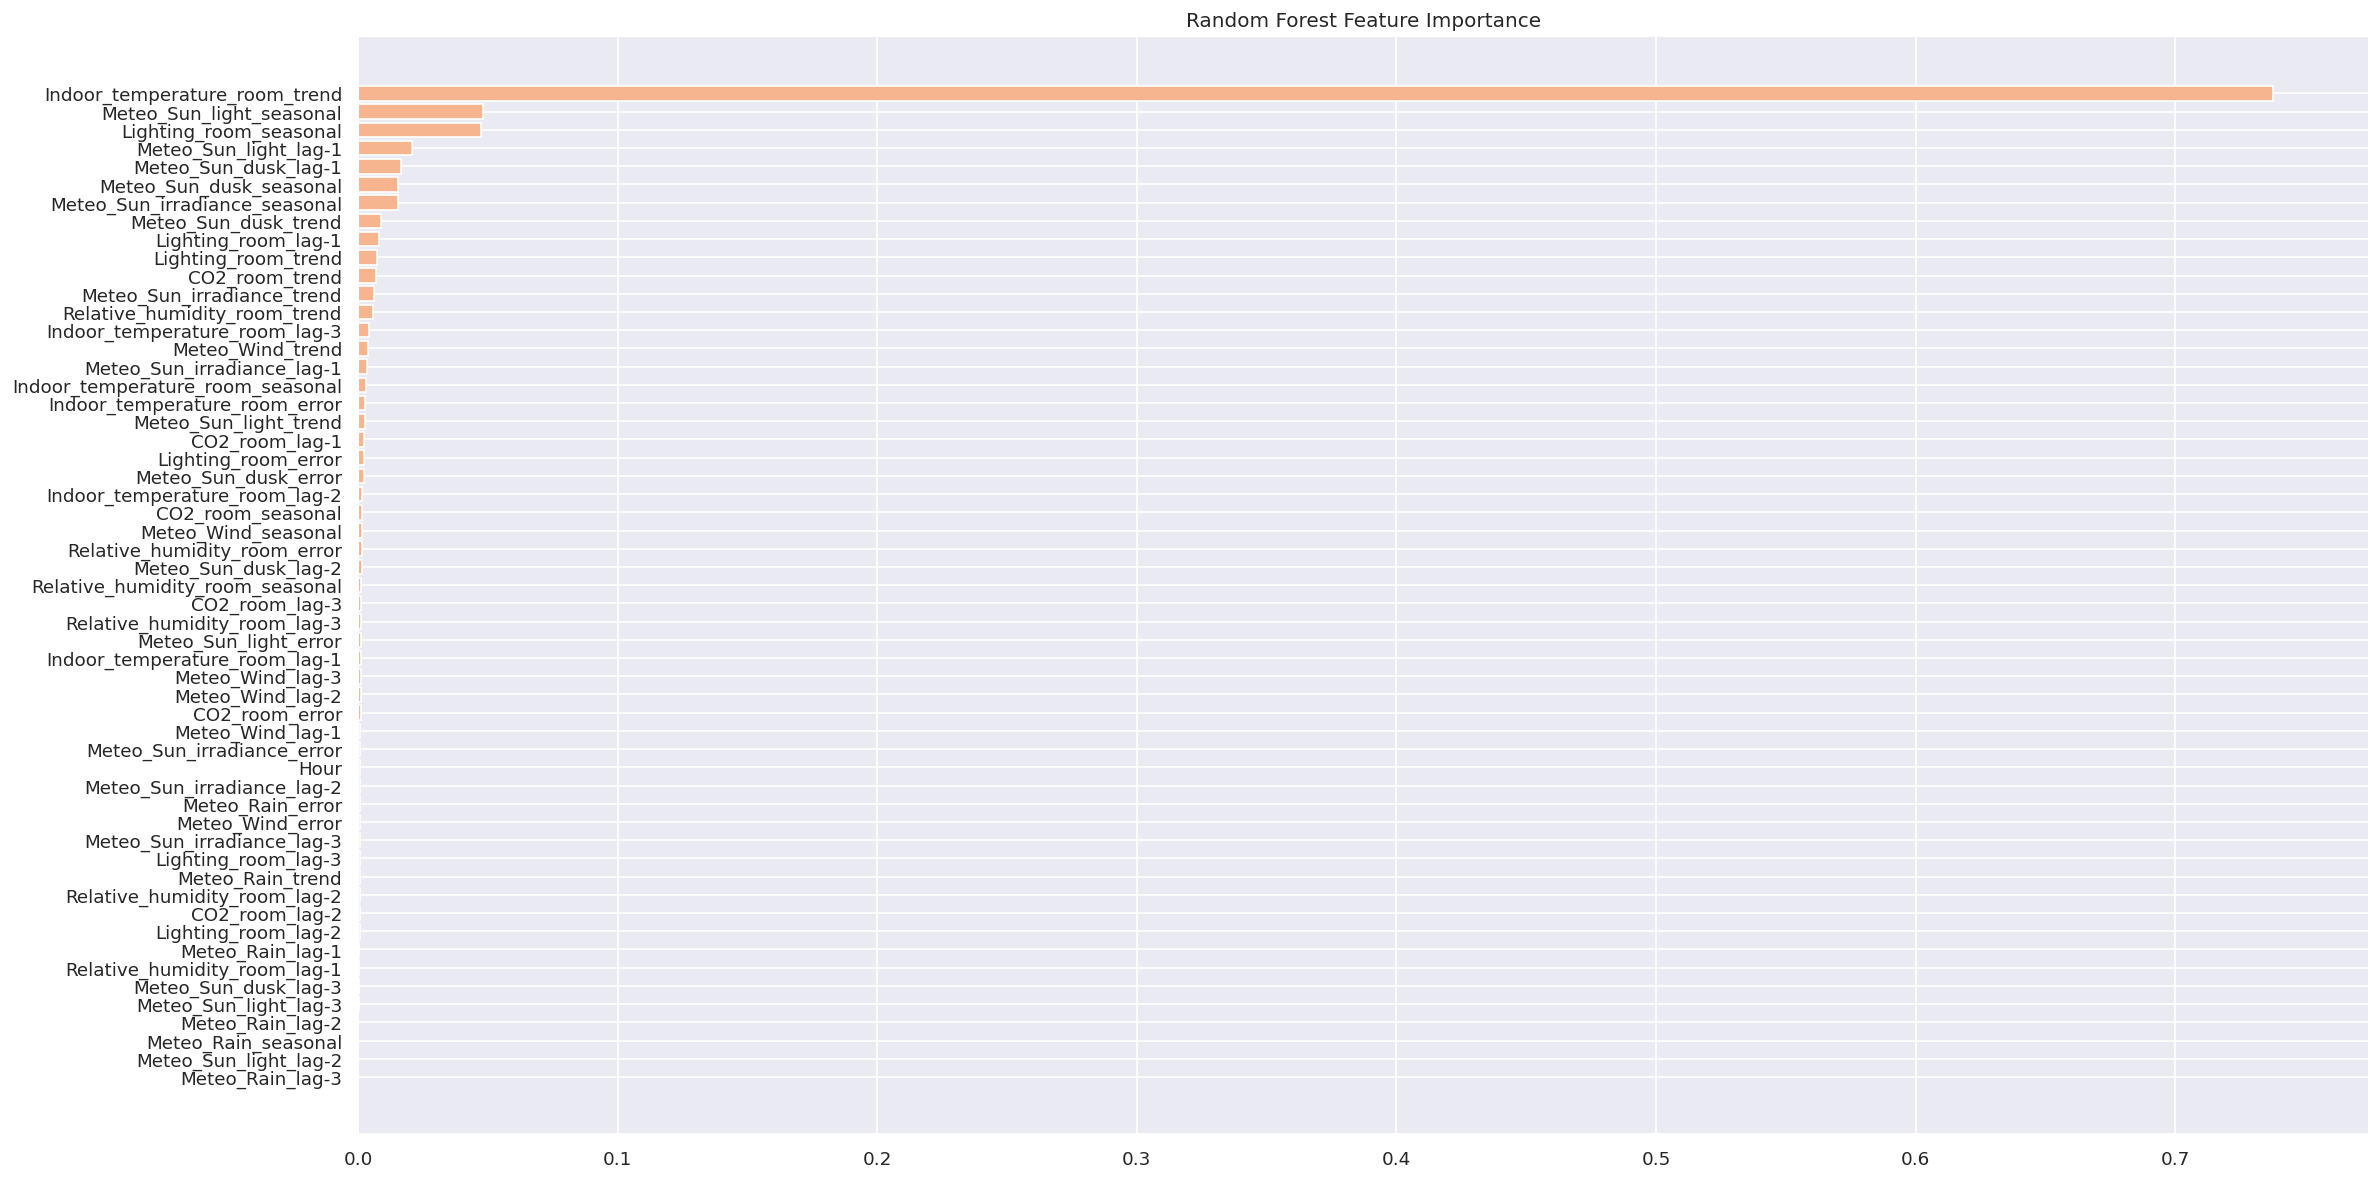

In [ ]:
# plot feature importance

plt.figure(dpi=120, figsize=(20,10))
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.tight_layout();

In [ ]:
# let's take a look at the train_data again and use it to create multistep forecasts
data_grouped

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  
2012-03-13 11:00:00                    17.83  
2012-03-13 12:00:00                    18.59  
2012-03-13 13:00:00                    19.63  
2012-03-13 14:00:00                    20.46  
2012-03-13 15:00:00                    21.96  
...                                      ...  
2012-04-11 02:00:00                    22.02  
2012-04-11 03:00:00                    21.65  
2012-04-11 04:00:00                    21.26  
2012-04-11 05:00:00                    20.86  
2012-04-11 06:00:00                    20.51  

[692 rows x 9 columns]

In [ ]:
#create a new dataset by copying train_data
mutistep_df = data_grouped.copy()

#create date features to cyclicaly encode month day and hour
#mutistep_df['Year'] = data_grouped.index.year
mutistep_df['Month'] =  data_grouped.index.month
mutistep_df['Day'] =  data_grouped.index.day
mutistep_df['Hour'] =  data_grouped.index.hour
mutistep_df

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  Month  Day  Hour  
2012-03-13 11:00:00                    17.83      3   13    11  
2012-03-13 12:00:00                    18.59      3   13    12  
2012-03-13 13:00:00                    19.63      3   13    13  
2012-03-13 14:00:00                    20.46      3   13    14  
2012-03-13 15:00:00                    21.96      3   13    15  
...                                      ...    ...  ...   ...  
2012-04-11 02:00:00                    22.02      4   11     2  
2012-04-11 03:00:00                    21.65      4   11     3  
2012-04-11 04:00:00                    21.26      4   11     4  
2012-04-11 05:00:00                    20.86      4   11     5  
2012-04-11 06:00:00                    20.51      4   11     6  

[692 rows x 12 columns]

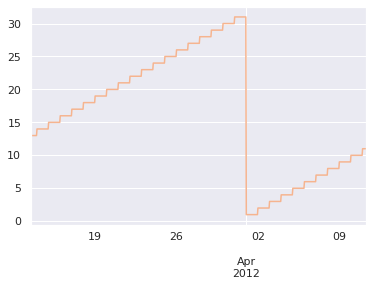

In [ ]:
ax = mutistep_df['Day'].plot()

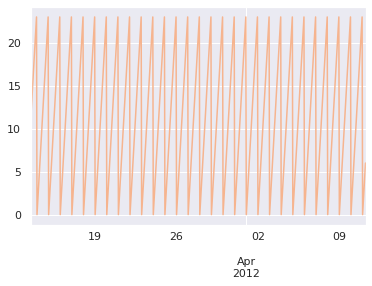

In [ ]:
ax = mutistep_df['Hour'].plot()

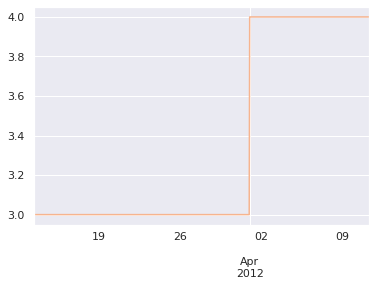

In [ ]:
ax = mutistep_df['Month'].plot()

In [ ]:
#radially/cyclically encode month, day and hour

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

mutistep_df = encode(mutistep_df, 'Month', 12)
mutistep_df = encode(mutistep_df, 'Day', 31)
mutistep_df = encode(mutistep_df, 'Hour', 24)

In [ ]:
mutistep_df

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  Month  Day  Hour  Month_sin  \
2012-03-13 11:00:00                    17.83      3   13    11   1.000000   
2012-03-13 12:00:00                    18.59      3   13    12   1.000000   
2012-03-13 13:00:00                    19.63      3   13    13   1.000000   
2012-03-13 14:00:00                    20.46      3   13    14   1.000000   
2012-03-13 15:00:00                    21.96      3   13    15   1.000000   
...                                      ...    ...  ...   ...        ...   
2012-04-11 02:00:00                    22.02      4   11     2   0.866025   
2012-04-11 03:00:00                    21.65      4   11     3   0.866025   
2012-04-11 04:00:00                    21.26      4   11     4   0.866025   
2012-04-11 05:00:00                    20.86      4   11     5   0.866025   
2012-04-11 06:00:00                    20.51      4   11     6   0.866025   

                        Month_cos   Day_sin   Day_cos      Hour_sin  \
2012-03-13 11:00:00  6.123234e-17  0.485302 -0.874347  2.588190e-01   
2012-03-13 12:00:00  6.123234e-17  0.485302 -0.874347  1.224647e-16   
2012-03-13 13:00:00  6.123234e-17  0.485302 -0.874347 -2.588190e-01   
2012-03-13 14:00:00  6.123234e-17  0.485302 -0.874347 -5.000000e-01   
2012-03-13 15:00:00  6.123234e-17  0.485302 -0.874347 -7.071068e-01   
...                           ...       ...       ...           ...   
2012-04-11 02:00:00 -5.000000e-01  0.790776 -0.612106  5.000000e-01   
2012-04-11 03:00:00 -5.000000e-01  0.790776 -0.612106  7.071068e-01   
2012-04-11 04:00:00 -5.000000e-01  0.790776 -0.612106  8.660254e-01   
2012-04-11 05:00:00

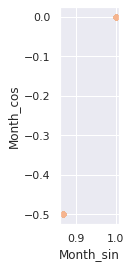

In [ ]:
#cyclically encoded months
ax = mutistep_df.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal')

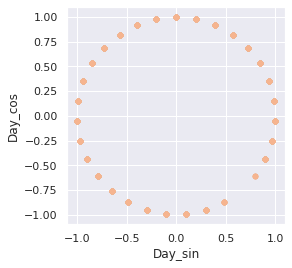

In [ ]:
#cyclically encoded days
ax = mutistep_df.plot.scatter('Day_sin', 'Day_cos').set_aspect('equal')

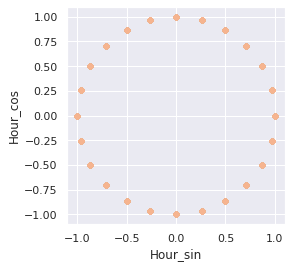

In [ ]:
#cyclically encoded hours
ax = mutistep_df.plot.scatter('Hour_sin', 'Hour_cos').set_aspect('equal')

In [ ]:
# delete columns Month, Day and Hour
mutistep_df = mutistep_df.drop(['Month', 'Day','Hour'], axis = 1)
mutistep_df

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   
2012-04-11 06:00:00         0.0          615.31        0.51   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   
2012-04-11 06:00:00                 68.68         16198.48   

                     Indoor_temperature_room  Month_sin     Month_cos  \
2012-03-13 11:00:00                    17.83   1.000000  6.123234e-17   
2012-03-13 12:00:00                    18.59   1.000000  6.123234e-17   
2012-03-13 13:00:00                    19.63   1.000000  6.123234e-17   
2012-03-13 14:00:00                    20.46   1.000000  6.123234e-17   
2012-03-13 15:00:00                    21.96   1.000000  6.123234e-17   
...                                      ...        ...           ...   
2012-04-11 02:00:00                    22.02   0.866025 -5.000000e-01   
2012-04-11 03:00:00                    21.65   0.866025 -5.000000e-01   
2012-04-11 04:00:00                    21.26   0.866025 -5.000000e-01   
2012-04-11 05:00:00                    20.86   0.866025 -5.000000e-01   
2012-04-11 06:00:00                    20.51   0.866025 -5.000000e-01   

                      Day_sin   Day_cos      Hour_sin      Hour_cos  
2012-03-13 11:00:00  0.485302 -0.874347  2.588190e-01 -9.659258e-01  
2012-03-13 12:00:00  0.485302 -0.874347  1.224647e-16 -1.000000e+00  
2012-03-13 13:00:00  0.485302 -0.874347 -2.588190e-01 -9.659258e-01  
2012-03-13 14:00:00  0.485302 -0.874347 -5.000000e-01 -8.660254e-01  
2012-03-13 15:00:00  0.485302 -0.874347 -7.071068e-01 -7.071068e-01  
...                       ...       ...           ...           ...  
2012-04-11 02:00:00  0.790776 -0.612106  5.000000e-01  8.660254e-01  
2012-04-11 03:00:00  0.790776 -0.612106  7.071068e-01  7.071068e-01  
2012-04-11 04:00:00  0.790776 -0.612106  8.660254e-01  5.000000e-01  
2012-04-11 05:00:00  0.790776 -0.612106  9.659258e-01  2.588190e-01  
2012-04

In [ ]:
# the aforementioned 'mutistep_df' will be used to create input and output sequences for modeling.
# but before that we  need to take a subset of the dataset to contain the last 48 hours' information
# this to be fed into the model so as to forecast the next 48 hours

#create the dataset (test) that contains the last 48 hours' values
last_48_hours_data = mutistep_df.copy().tail(48)
last_48_hours_data

CO2_room  Relative_humidity_room  Lighting_room  \
2012-04-09 07:00:00    200.85                   44.19          52.17   
2012-04-09 08:00:00    198.11                   43.11          97.37   
2012-04-09 09:00:00    196.94                   42.75         136.25   
2012-04-09 10:00:00    195.73                   43.19         132.75   
2012-04-09 11:00:00    194.87                   43.77         132.40   
2012-04-09 12:00:00    194.82                   44.45         117.32   
2012-04-09 13:00:00    195.17                   45.15         100.23   
2012-04-09 14:00:00    195.15                   45.96          72.83   
2012-04-09 15:00:00    194.97                   46.75          47.73   
2012-04-09 16:00:00    194.94                   47.73          31.52   
2012-04-09 17:00:00    194.03                   48.48          23.42   
2012-04-09 18:00:00    193.43                   49.22          19.84   
2012-04-09 19:00:00    194.74                   49.92          13.04   
2012-04-09 20:00:00    194.57                   50.27          12.90   
2012-04-09 21:00:00    194.35                   50.38          12.95   
2012-04-09 22:00:00    195.61                   50.47          13.00   
2012-04-09 23:00:00    196.03                   50.47          13.09   
2012-04-10 00:00:00    198.15                   50.60          13.15   
2012-04-10 01:00:00    198.69                   50.69          13.19   
2012-04-10 02:00:00    201.17                   51.09          13.31   
2012-04-10 03:00:00    204.14                   51.11          13.42   
2012-04-10 04:00:00    205.00                   51.59          13.40   
2012-04-10 05:00:00    205.53                   51.68          13.29   
2012-04-10 06:00:00    205.55                   52.00          21.39   
2012-04-10 07:00:00    204.59                   52.11          23.92   
2012-04-10 08:00:00    202.65                   52.14          45.56   
2012-04-10 09:00:00    199.93                   50.83          86.69   
2012-04-10 10:00:00    198.17                   50.25         120.37   
2012-04-10 11:00:00    194.34                   49.27         102.08   
2012-04-10 12:00:00    193.52                   47.88         129.57   
2012-04-10 13:00:00    193.24                   46.25         100.48   
2012-04-10 14:00:00    193.10                   43.93          67.09   
2012-04-10 15:00:00    193.22                   41.86          39.28   
2012-04-10 16:00:00    193.12                   39.62          24.26   
2012-04-10 17:00:00    192.85                   38.80          22.81   
2012-04-10 18:00:00    192.18                   38.86          19.81   
2012-04-10 19:00:00    192.46                   38.68          12.94   
2012-04-10 20:00:00    192.23                   38.52          12.87   
2012-04-10 21:00:00    192.25                   38.83          12.85   
2012-04-10 22:00:00    192.36                   39.59          12.96   
2012-04-10 23:00:00    192.15                   40.25          12.96   
2012-04-11 00:00:00    191.69                   40.68          12.87   
2012-04-11 01:00:00    191.89                   40.89          13.05   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   
2012-04-11 06:00:00    193.57                   41.80          23.00   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-04-09 07:00:00         0.0          620.32        0.00   
2012-04-09 08:00:00         0.0          621.77        0.83   
2012-04-09 09:00:00         0.0          622.03        1.47   
2012-04-09 10:00:00         0.0          621.82        1.86   
2012-04-09 11:00:00         0.0          621.37        2.58   
2012-04-09 12:00:00         0.0          620.86        2.80   
2012-04-09 13:00:00         0.0          620.16    

In [ ]:
# shift column Indoor_temperature_room to create a y label that is actuals shifted by 1 hour
# this is going to be our target variable that we need to predict

mutistep_df['y'] = mutistep_df['Indoor_temperature_room'].shift(-1)

#get rid of NAs that will be created on the last row because of shifting the actuals
mutistep_df = mutistep_df.dropna()
mutistep_df

CO2_room  Relative_humidity_room  Lighting_room  \
2012-03-13 11:00:00    221.92                   42.42         113.52   
2012-03-13 12:00:00    218.11                   42.16         113.40   
2012-03-13 13:00:00    215.42                   42.04         105.30   
2012-03-13 14:00:00    215.87                   42.11          69.94   
2012-03-13 15:00:00    217.92                   40.83          35.38   
...                       ...                     ...            ...   
2012-04-11 01:00:00    191.89                   40.89          13.05   
2012-04-11 02:00:00    191.94                   41.03          13.17   
2012-04-11 03:00:00    191.48                   41.21          12.98   
2012-04-11 04:00:00    191.59                   41.50          13.16   
2012-04-11 05:00:00    192.32                   41.69          14.64   

                     Meteo_Rain  Meteo_Sun_dusk  Meteo_Wind  \
2012-03-13 11:00:00         0.0          623.36        1.43   
2012-03-13 12:00:00         0.0          622.71        1.92   
2012-03-13 13:00:00         0.0          621.81        2.18   
2012-03-13 14:00:00         0.0          619.78        2.61   
2012-03-13 15:00:00         0.0          619.00        1.92   
...                         ...             ...         ...   
2012-04-11 01:00:00         0.0            0.74        0.52   
2012-04-11 02:00:00         0.0            0.84        1.00   
2012-04-11 03:00:00         0.0            0.65        0.86   
2012-04-11 04:00:00         0.0            0.65        0.41   
2012-04-11 05:00:00         0.0          259.66        0.37   

                     Meteo_Sun_irradiance  Meteo_Sun_light  \
2012-03-13 11:00:00                758.88         39243.75   
2012-03-13 12:00:00                764.28         40892.22   
2012-03-13 13:00:00                728.53         52667.71   
2012-03-13 14:00:00                631.16         58077.94   
2012-03-13 15:00:00                481.14         48938.29   
...                                   ...              ...   
2012-04-11 01:00:00                 -3.63             0.00   
2012-04-11 02:00:00                 -3.79             0.00   
2012-04-11 03:00:00                 -3.69             0.00   
2012-04-11 04:00:00                 -3.63             0.00   
2012-04-11 05:00:00                 -1.70           308.82   

                     Indoor_temperature_room  Month_sin     Month_cos  \
2012-03-13 11:00:00                    17.83   1.000000  6.123234e-17   
2012-03-13 12:00:00                    18.59   1.000000  6.123234e-17   
2012-03-13 13:00:00                    19.63   1.000000  6.123234e-17   
2012-03-13 14:00:00                    20.46   1.000000  6.123234e-17   
2012-03-13 15:00:00                    21.96   1.000000  6.123234e-17   
...                                      ...        ...           ...   
2012-04-11 01:00:00                    22.36   0.866025 -5.000000e-01   
2012-04-11 02:00:00                    22.02   0.866025 -5.000000e-01   
2012-04-11 03:00:00                    21.65   0.866025 -5.000000e-01   
2012-04-11 04:00:00                    21.26   0.866025 -5.000000e-01   
2012-04-11 05:00:00                    20.86   0.866025 -5.000000e-01   

                      Day_sin   Day_cos      Hour_sin  Hour_cos      y  
2012-03-13 11:00:00  0.485302 -0.874347  2.588190e-01 -0.965926  18.59  
2012-03-13 12:00:00  0.485302 -0.874347  1.224647e-16 -1.000000  19.63  
2012-03-13 13:00:00  0.485302 -0.874347 -2.588190e-01 -0.965926  20.46  
2012-03-13 14:00:00  0.485302 -0.874347 -5.000000e-01 -0.866025  21.96  
2012-03-13 15:00:00  0.485302 -0.874347 -7.071068e-01 -0.707107  23.08  
...                       ...       ...           ...       ...    ...  
2012-04-11 01:00:00  0.790776 -0.612106  2.588190e-01  0.965926  22.02  
2012-04-11 02:00:00  0.790776 -0.612106  5.000000e-01  0.866025  21.65  
2012-04-11 03:00:00  0.790776 -0.612106  7.071068e-01  0.707107  21.26  
2012-04-11 04:00:00  0.790776 -0.612106  8.6602

In [ ]:
# ### Create input and output sequences (input is data from last 48 hours to predict the next 24 hours)

# multivariate multi-step data preparation

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps to look in the last to predict the number of time steps into the future
#look at 48 hours in the past to predict the next 24 hours
n_steps_in, n_steps_out = 48, 48

# convert into input/output
X_train, y_train = split_sequences(mutistep_df.values, n_steps_in, n_steps_out)

In [ ]:
X_train

array([[[ 2.21920000e+02,  4.24200000e+01,  1.13520000e+02, ...,
         -8.74346616e-01,  2.58819045e-01, -9.65925826e-01],
        [ 2.18110000e+02,  4.21600000e+01,  1.13400000e+02, ...,
         -8.74346616e-01,  1.22464680e-16, -1.00000000e+00],
        [ 2.15420000e+02,  4.20400000e+01,  1.05300000e+02, ...,
         -8.74346616e-01, -2.58819045e-01, -9.65925826e-01],
        ...,
        [ 2.21370000e+02,  4.43300000e+01,  5.94100000e+01, ...,
         -9.94869323e-01,  8.66025404e-01, -5.00000000e-01],
        [ 2.19770000e+02,  4.50400000e+01,  1.07480000e+02, ...,
         -9.94869323e-01,  7.07106781e-01, -7.07106781e-01],
        [ 2.15080000e+02,  4.55000000e+01,  1.13840000e+02, ...,
         -9.94869323e-01,  5.00000000e-01, -8.66025404e-01]],

       [[ 2.18110000e+02,  4.21600000e+01,  1.13400000e+02, ...,
         -8.74346616e-01,  1.22464680e-16, -1.00000000e+00],
        [ 2.15420000e+02,  4.20400000e+01,  1.05300000e+02, ...,
         -8.74346616e-01, -2.58819045e

In [ ]:
y_train

array([[19.07, 19.79, 20.4 , ..., 14.97, 15.66, 16.85],
       [19.79, 20.4 , 20.73, ..., 15.66, 16.85, 18.27],
       [20.4 , 20.73, 20.83, ..., 16.85, 18.27, 19.67],
       ...,
       [17.56, 17.2 , 17.1 , ..., 22.02, 21.65, 21.26],
       [17.2 , 17.1 , 17.46, ..., 21.65, 21.26, 20.86],
       [17.1 , 17.46, 18.25, ..., 21.26, 20.86, 20.51]])

In [ ]:
X_train[0]

array([[ 2.21920000e+02,  4.24200000e+01,  1.13520000e+02,
         0.00000000e+00,  6.23360000e+02,  1.43000000e+00,
         7.58880000e+02,  3.92437500e+04,  1.78300000e+01,
         1.00000000e+00,  6.12323400e-17,  4.85301963e-01,
        -8.74346616e-01,  2.58819045e-01, -9.65925826e-01],
       [ 2.18110000e+02,  4.21600000e+01,  1.13400000e+02,
         0.00000000e+00,  6.22710000e+02,  1.92000000e+00,
         7.64280000e+02,  4.08922200e+04,  1.85900000e+01,
         1.00000000e+00,  6.12323400e-17,  4.85301963e-01,
        -8.74346616e-01,  1.22464680e-16, -1.00000000e+00],
       [ 2.15420000e+02,  4.20400000e+01,  1.05300000e+02,
         0.00000000e+00,  6.21810000e+02,  2.18000000e+00,
         7.28530000e+02,  5.26677100e+04,  1.96300000e+01,
         1.00000000e+00,  6.12323400e-17,  4.85301963e-01,
        -8.74346616e-01, -2.58819045e-01, -9.65925826e-01],
       [ 2.15870000e+02,  4.21100000e+01,  6.99400000e+01,
         0.00000000e+00,  6.19780000e+02,  2.61000000

In [ ]:
y_train[0]

array([19.07, 19.79, 20.4 , 20.73, 20.83, 20.79, 20.58, 20.21, 19.8 ,
       19.38, 18.94, 18.51, 18.04, 17.58, 17.12, 16.59, 16.1 , 15.65,
       15.17, 14.71, 14.38, 14.35, 14.88, 15.83, 16.99, 18.05, 18.9 ,
       19.51, 19.83, 19.91, 19.76, 19.5 , 19.23, 18.93, 18.58, 18.21,
       17.84, 17.47, 17.1 , 16.68, 16.27, 15.86, 15.48, 15.13, 14.89,
       14.97, 15.66, 16.85])

In [ ]:
y_train.shape

(597, 48)

In [ ]:
X_train.shape

(597, 48, 15)

In [ ]:
#reshape X_train to be 2 dimensional so that it can be used by ml algorithms like xgboost, etc
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))

#X_train and y_train have been created
#next, create X_test from the last_48_hours_data
X_test = last_48_hours_data.values.flatten()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(597, 720)
(720,)


In [ ]:
# ### perform PCA on the X_train and X_test datasets

# first, standardize the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test.reshape(1, -1))

#perform pca on the standardized data
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) #capture 95% of the variation in the dataset
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(597, 39)
(1, 39)


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101] TEST: [102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.0 MB/s 


In [ ]:
# Machine learning follows
#train the models on the past to predict the future

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor #direct multioutput wrapper
from sklearn.multioutput import RegressorChain #chained multioutput wrapper
from sklearn import model_selection


# prepare configuration for cross validation test harness
seed = 7

# prepare models to create predcitions
models = []

#direct Models
models.append(('KNeigh Multi', MultiOutputRegressor(KNeighborsRegressor())))
models.append(('RF Multi', MultiOutputRegressor(RandomForestRegressor())))
models.append(('GBR Multi', MultiOutputRegressor(GradientBoostingRegressor())))
models.append(('XGB Multi', MultiOutputRegressor(xgb.XGBRegressor())))
models.append(('LGB Multi', MultiOutputRegressor(lgb.LGBMRegressor())))
models.append(('KNeigh Chained', RegressorChain(KNeighborsRegressor())))
models.append(('RF Chained', RegressorChain(RandomForestRegressor())))
models.append(('GBR Chained', RegressorChain(GradientBoostingRegressor())))
models.append(('XGB Chained', RegressorChain(xgb.XGBRegressor())))
models.append(('LGB Chained', RegressorChain(lgb.LGBMRegressor())))


In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=tscv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


KNeigh Multi: -2.069348 (1.034797)
RF Multi: -2.401162 (0.749406)
GBR Multi: -2.340705 (0.849129)
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
names

['KNeigh Multi',
 'RF Multi',
 'GBR Multi',
 'XGB Multi',
 'LGB Multi',
 'KNeigh Chained',
 'RF Chained',
 'GBR Chained',
 'XGB Chained',
 'LGB Chained']

In [ ]:
results

[array([-3.75078157, -0.9517984 , -2.76402399, -1.48087332, -1.39926515]),
 array([-3.42222401, -2.06997462, -3.15375149, -1.83653285, -1.52332721]),
 array([-3.43630791, -1.95130005, -3.28417437, -1.54968212, -1.48206177]),
 array([-3.3308574 , -1.85914406, -3.1471116 , -1.47925402, -1.51922425]),
 array([-3.33322341, -1.78842062, -3.02974525, -1.55440215, -1.44703843]),
 array([-3.87214478, -1.07663973, -2.74553072, -1.4804234 , -1.39306944]),
 array([-3.91301115, -1.6576302 , -3.39927849, -2.62495173, -1.36585271]),
 array([-3.41620492, -1.46078963, -2.47594541, -2.4478607 , -1.65815678]),
 array([-3.3606565 , -1.57561976, -2.67821504, -1.88112758, -1.41370539]),
 array([-3.36110625, -1.44964684, -2.6600255 , -2.32847945, -2.0242672 ])]

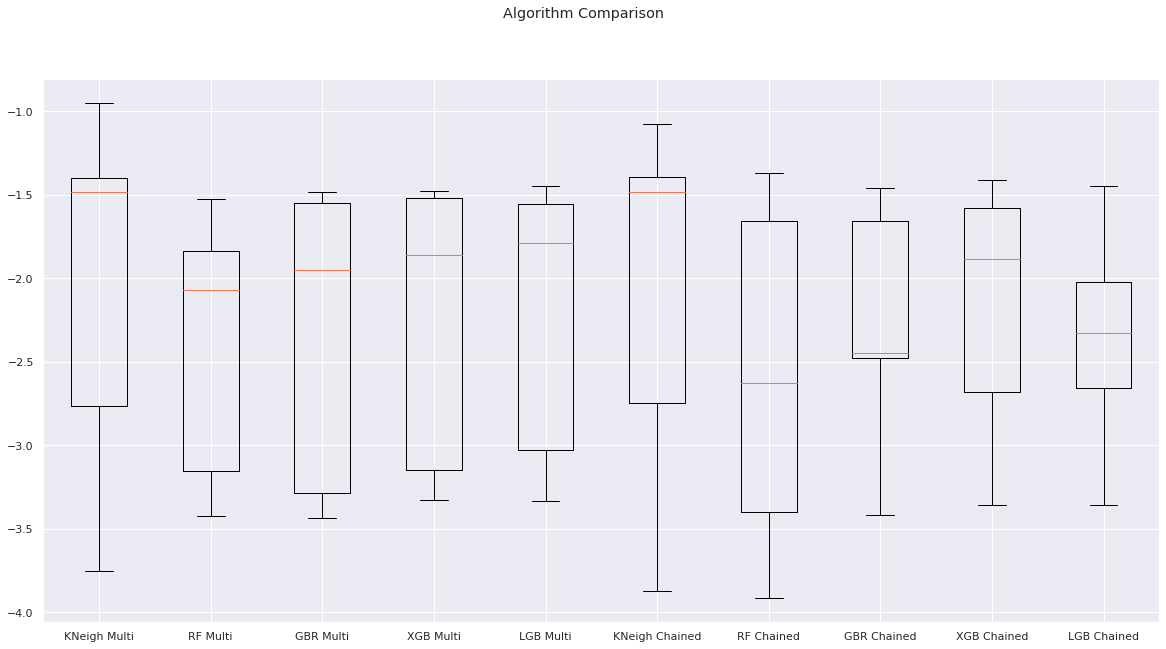

In [ ]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# prepare models to create predcitions
prediction_models = []

#direct Models
prediction_models.append(('KNeigh Multi', MultiOutputRegressor(KNeighborsRegressor())))
prediction_models.append(('LGB Multi', MultiOutputRegressor(lgb.LGBMRegressor())))
prediction_models.append(('XGB Chained', RegressorChain(xgb.XGBRegressor())))

In [ ]:
# create a dataframe to store the multivariate predictions
multivariate_pred = pd.DataFrame(index=last_48_hours_data.index)

#run the different ML models to create the predictions dataset
for name, model in prediction_models:
    model.fit(X_train, y_train)
    #create preictions for the next 48 hours
    yhat = model.predict(X_test)
    multivariate_pred[name +'_predictions'] = yhat.flatten()


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


[13:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
multivariate_pred

KNeigh Multi_predictions  LGB Multi_predictions  \
2012-04-09 07:00:00                    16.586              18.238871   
2012-04-09 08:00:00                    16.830              17.575345   
2012-04-09 09:00:00                    17.444              17.105391   
2012-04-09 10:00:00                    18.372              17.291460   
2012-04-09 11:00:00                    19.482              16.746714   
2012-04-09 12:00:00                    20.602              16.241108   
2012-04-09 13:00:00                    21.524              15.951039   
2012-04-09 14:00:00                    22.168              16.617466   
2012-04-09 15:00:00                    22.556              15.293820   
2012-04-09 16:00:00                    22.698              15.096873   
2012-04-09 17:00:00                    22.642              15.895951   
2012-04-09 18:00:00                    22.420              18.234556   
2012-04-09 19:00:00                    22.088              18.232108   
2012-04-09 20:00:00                    21.684              17.637726   
2012-04-09 21:00:00                    21.244              18.667958   
2012-04-09 22:00:00                    20.802              18.922374   
2012-04-09 23:00:00                    20.384              17.890082   
2012-04-10 00:00:00                    19.990              17.733721   
2012-04-10 01:00:00                    19.596              16.303126   
2012-04-10 02:00:00                    19.210              15.747529   
2012-04-10 03:00:00                    18.850              16.279140   
2012-04-10 04:00:00                    18.504              15.662653   
2012-04-10 05:00:00                    18.178              14.725387   
2012-04-10 06:00:00                    17.934              13.579857   
2012-04-10 07:00:00                    17.868              13.279789   
2012-04-10 08:00:00                    18.048              12.952771   
2012-04-10 09:00:00                    18.526              13.029209   
2012-04-10 10:00:00                    19.260              13.950274   
2012-04-10 11:00:00                    20.194              13.923096   
2012-04-10 12:00:00                    21.188              14.266916   
2012-04-10 13:00:00                    22.134              14.567810   
2012-04-10 14:00:00                    22.902              14.237504   
2012-04-10 15:00:00                    23.462              14.959660   
2012-04-10 16:00:00                    23.756              14.300550   
2012-04-10 17:00:00                    23.820              14.798004   
2012-04-10 18:00:00                    23.702              14.304786   
2012-04-10 19:00:00                    23.460              16.474478   
2012-04-10 20:00:00                    23.150              19.208741   
2012-04-10 21:00:00                    22.816              18.717641   
2012-04-10 22:00:00                    22.476              16.312015   
2012-04-10 23:00:00                    22.120              14.276795   
2012-04-11 00:00:00                    21.758              14.359328   
2012-04-11 01:00:00                    21.410              15.416810   
2012-04-11 02:00:00                    21.076              13.825406   
2012-04-11 03:00:00                    20.744              13.161208   
2012-04-11 04:00:00                    20.414              12.977364   
2012-04-11 05:00:00                    20.088              12.929155   
2012-04-11 06:00:00                    19.794              15.078055   

                     XGB Chained_predictions  
2012-04-09 07:00:00                17.676651  
2012-04-09 08:00:00                17.859142  
2012-04-09 09:00:00                18.415819  
2012-04-09 10:00:00                18.943014  
2012-04-09 11:00:00                19.401430  
2012-04-09 12:00:00                20.156300  
2012-04-09 13:00:00                20.688374  
2012-04-09 14:00:00                20.789555  
2012-04-09 15:00:00                20.841030  
2012-04-09 16:00:00   

In [ ]:
last_48_hours_data.Indoor_temperature_room

2012-04-09 07:00:00    17.10
2012-04-09 08:00:00    17.46
2012-04-09 09:00:00    18.25
2012-04-09 10:00:00    19.41
2012-04-09 11:00:00    20.55
2012-04-09 12:00:00    21.56
2012-04-09 13:00:00    22.32
2012-04-09 14:00:00    22.75
2012-04-09 15:00:00    23.00
2012-04-09 16:00:00    23.01
2012-04-09 17:00:00    22.82
2012-04-09 18:00:00    22.47
2012-04-09 19:00:00    22.04
2012-04-09 20:00:00    21.59
2012-04-09 21:00:00    21.15
2012-04-09 22:00:00    20.74
2012-04-09 23:00:00    20.34
2012-04-10 00:00:00    19.94
2012-04-10 01:00:00    19.59
2012-04-10 02:00:00    19.29
2012-04-10 03:00:00    18.99
2012-04-10 04:00:00    18.70
2012-04-10 05:00:00    18.44
2012-04-10 06:00:00    18.23
2012-04-10 07:00:00    18.11
2012-04-10 08:00:00    18.19
2012-04-10 09:00:00    18.67
2012-04-10 10:00:00    19.48
2012-04-10 11:00:00    20.71
2012-04-10 12:00:00    21.87
2012-04-10 13:00:00    23.02
2012-04-10 14:00:00    23.87
2012-04-10 15:00:00    24.41
2012-04-10 16:00:00    24.67
2012-04-10 17:

In [ ]:
metrics_dataframe = metrics_cal(last_48_hours_data.Indoor_temperature_room.values.flatten(),
                                multivariate_pred['KNeigh Multi_predictions'].values.flatten(),
                                'KNN')


metrics_dataframe = metrics_cal(last_48_hours_data.Indoor_temperature_room.values.flatten(),
                                multivariate_pred['LGB Multi_predictions'].values.flatten(),
                                'LGB')

metrics_dataframe = metrics_cal(last_48_hours_data.Indoor_temperature_room.values.flatten(),
                                multivariate_pred['XGB Chained_predictions'].values.flatten(),
                                'XGB')


In [ ]:
metrics_dataframe

Model         R2      RMSE       MAE       MAPE
0  Triple Add  -8.056781  3.287142  3.021070  15.712830
0  Triple Mul -43.911280  7.319969  6.537452  34.295356
0      SARIMA  -0.021428  1.103915  1.025392   5.313334
0         VAR   0.673846  0.623797  0.545445   2.832033
0     SARIMAX  -0.020884  1.103621  1.025236   5.312474
0         KNN   0.900327  0.673460  0.562958   2.583191
0         KNN   0.900327  0.673460  0.562958   2.583191
0         LGB  -7.618850  6.262519  5.660642  25.882111
0         XGB  -2.952260  4.240794  3.649788  16.696584

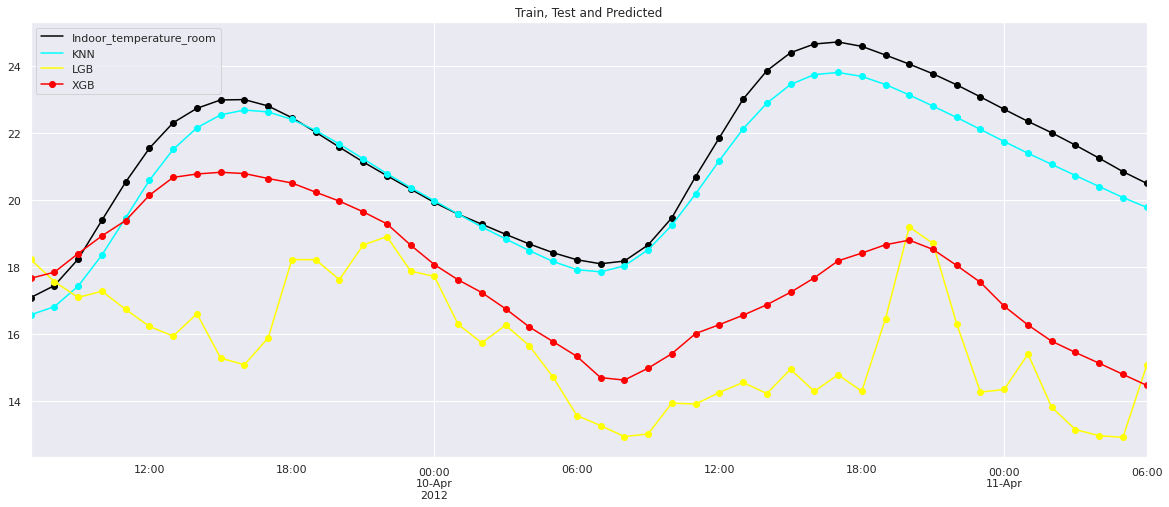

In [ ]:
#plot the train, test, and predictions

#After creating models we will visualize the plot

ax = last_48_hours_data.Indoor_temperature_room.plot(marker='o', color='black', figsize=(20,8), legend=True)

multivariate_pred['KNeigh Multi_predictions'].plot(marker='o', ax=ax, color='cyan', legend=True, label = 'KNN')

multivariate_pred['LGB Multi_predictions'].plot(marker='o', ax=ax, color='yellow', legend=True, label = 'LGB')

multivariate_pred['XGB Chained_predictions'].plot(marker='o', ax=ax, color='red', legend=True, label = 'XGB')

plt.title('Train, Test and Predicted')
plt.show()

Apart from the above models we have also have trained the dataset on LSTM and Linear models

In [ ]:
# fix right skewness with log
right_skewed_cols=["CO2_(dinning-room)","CO2_room","Lighting_(dinning-room)","Lighting_room",\
                   "Meteo_Rain","Meteo_Wind","Meteo_Sun_light_in_west_facade","Meteo_Sun_light_in_east_facade",\
                   "Meteo_Sun_light_in_south_facade","Meteo_Sun_irradiance"]
data[right_skewed_cols]=np.log(data[right_skewed_cols]+10)

In [ ]:
# normalize feature columns
norm_feature_cols=feature_cols.copy()
norm_feature_cols.remove("Day_of_the_week")# remove an enumerate variable
feature_mean=data[norm_feature_cols].mean()
feature_std=data[norm_feature_cols].std()
normalization_params={"mean":feature_mean,"std":feature_std}
data[norm_feature_cols]=(data[norm_feature_cols]-normalization_params["mean"])/normalization_params["std"]
# normalize label column
label_norm={"mean":data[label_col].mean()[0],"std":data[label_col].std()[0]}
data[label_col]=(data[label_col]-label_norm["mean"])/label_norm["std"]

In [ ]:
data=data.sort_index(ascending=True)

In [ ]:
#global
history_len=20
batch_size=4
train_test_split_percentage=0.75
input_size=320
hidden_size=20
num_layers=2
dropout=1e-2
output_size=1
seed=42
epochs=200
loss_function=nn.MSELoss()

In [ ]:
def set_seed(seed):
    torch.manual_seed(seed)
    try:
        torch.cuda.manual_seed_all(seed)
    except:
        print("No cuda")

class SimpleDataset(Dataset):
    def __init__(self,data):
        super().__init__()
        self.data=data
    def __getitem__(self, index):
        return self.data[index]
    def __len__(self):
        return len(self.data)

class DatasetForSplit(Dataset):
    def __init__(self,input_data,history_len):
        super().__init__()
        self.history_len=history_len
        self.transformed_data={}
        self.label={}
        for r in range(0,input_data.shape[0]-history_len+1):
            # add feature: time_of_the_day: time passed in the sample day / 24 hours
            tmp=input_data.iloc[r:r+history_len,:]
            time=str(tmp.index[-1]).split(" ")[1].split(":")
            time_of_the_day=datetime.timedelta(hours=int(time[0]),minutes=int(time[1]))/datetime.timedelta(days=1)
            tmp=tmp.values.reshape(-1)
            #delete the last value : latest label
            self.label[r]=torch.Tensor(np.array([tmp[-1]]).astype("float32"))
            tmp[-1]=time_of_the_day
            self.transformed_data[r]=torch.from_numpy(tmp.astype("float32"))
    def __getitem__(self, index):
        return self.transformed_data[index]
    def __len__(self):
        return len(self.transformed_data)
    def split(self,percentage):
        """
        split train test by percentage
        """
        length_origin=self.__len__()
        p0=int(length_origin*percentage)
        print(f"train set {p0} test set {length_origin-p0}")
        transformed_data_0={}
        label_0={}
        for i in range(p0):
            transformed_data_0[i]=self.transformed_data[i]
            label_0[i]=self.label[i]
        transformed_data_1={}
        label_1={}
        for new_index,i in enumerate(list(range(p0,length_origin))):
            transformed_data_1[new_index]=self.transformed_data[i]
            label_1[new_index]=self.label[i]
        transformed_data_0=SimpleDataset(transformed_data_0)
        transformed_data_1=SimpleDataset(transformed_data_1)
        label_0=SimpleDataset(label_0)
        label_1=SimpleDataset(label_1)
        return transformed_data_0,transformed_data_1,label_0,label_1

class LstmLinear(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,label_norm,dropout=0,output_size=1):
        """
        input_size:The number of expected features in the input x.
        hidden_size:The number of features in the hidden state h.
        num_layers:Number of recurrent layers.
        label_norm:Params used for label normalization.
        dropout:If non-zero, introduces a Dropout layer on the outputs of each
            LSTM layer except the last layer, with dropout probability equal to dropout
        output_size:The number of expected features in the input x.
        """
        super().__init__()
        self.backbone_module=nn.LSTM(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          dropout=dropout)
        self.output_module=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x,_=self.backbone_module(x)
        x=self.output_module(x)
        x=x*label_norm["std"]+label_norm["mean"]
        return x

def train(train_x,train_y,model,loss_function,optimizer,label_norm):
    data_len=len(train_x.dataset)
    forward_len=0
    model.train()
    for batch,(x,y) in enumerate(zip(train_x,train_y)):
        x,y=x.to(device),y.to(device)
        #forward
        pred=model(x)
        loss_score=loss_function(pred,y*label_norm["std"]+label_norm["mean"])
        #backpropagation
        optimizer.zero_grad()
        loss_score.backward()
        optimizer.step()
        forward_len+=len(x)
    return loss_score

def test(test_x,test_y,model,loss_function,label_norm):
    model.eval()
    loss_score=0
    with torch.no_grad():
        for x,y in zip(test_x,test_y):
            x,y=x.to(device),y.to(device)
            pred=model(x)
            loss_score+=loss_function(pred,y*label_norm["std"]+label_norm["mean"])
    loss_score/=len(test_x.dataset)
    return loss_score

In [ ]:
set_seed(seed)
print(f"set seed {seed}")
print(f"history length {history_len}")
data_for_split=DatasetForSplit(data,history_len)
train_x,test_x,train_y,test_y=data_for_split.split(train_test_split_percentage)
train_x=DataLoader(train_x,batch_size=batch_size)
train_y=DataLoader(train_y,batch_size=batch_size)
print(f"train set batch size {batch_size}")
print(f"train set {len(train_x)} batchs")
test_x=DataLoader(test_x,batch_size=len(test_x))
test_y=DataLoader(test_y,batch_size=len(test_y))
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"{device} device")
model= LstmLinear(input_size,hidden_size,num_layers,label_norm,dropout,output_size).to(device)
print(model)
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)

set seed 42
history length 20
train set 2058 test set 687
train set batch size 4
train set 515 batchs
cpu device
LstmLinear(
  (backbone_module): LSTM(320, 20, num_layers=2, dropout=0.01)
  (output_module): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
print(f"start: {epochs} epochs to be done")
best_test_loss=float("INF")
for e in range(epochs):
    train_loss=train(train_x,train_y,model,loss_function,optimizer,label_norm)
    test_loss=test(test_x,test_y,model,loss_function,label_norm)
    test_loss=float(test_loss)
    if test_loss<best_test_loss:
        best_test_loss=test_loss
        print("epoch No.%4d train loss %7f test loss %7f"%(e+1,float(train_loss),float(test_loss)))
        torch.save(model.state_dict(),"best_LstmLinear.pt")
print("Done!")

start: 200 epochs to be done
epoch No.   1 train loss 0.106005 test loss 0.009832
epoch No.   2 train loss 0.037402 test loss 0.008624
epoch No.   5 train loss 0.011810 test loss 0.007043
epoch No.   8 train loss 0.028707 test loss 0.005786
epoch No.   9 train loss 0.022234 test loss 0.005152
epoch No.  10 train loss 0.039484 test loss 0.004607
epoch No.  11 train loss 0.017026 test loss 0.004432
epoch No.  12 train loss 0.020335 test loss 0.004060
epoch No.  13 train loss 0.022711 test loss 0.003597
epoch No.  15 train loss 0.011294 test loss 0.003532
epoch No.  17 train loss 0.014638 test loss 0.003399
epoch No.  18 train loss 0.230804 test loss 0.003203
epoch No.  20 train loss 0.011117 test loss 0.003024
epoch No.  21 train loss 0.012657 test loss 0.003004
epoch No.  22 train loss 0.014781 test loss 0.002914
epoch No.  23 train loss 0.008066 test loss 0.002885
epoch No.  24 train loss 0.009031 test loss 0.002730
epoch No.  25 train loss 0.200132 test loss 0.002721
epoch No.  26 tra

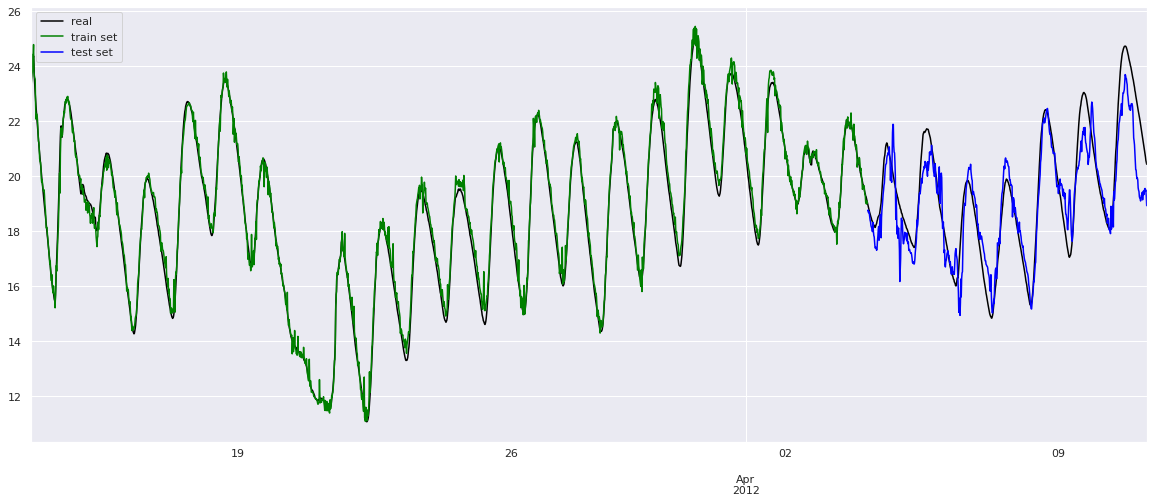

In [ ]:
# get test set
real_test=pd.Series(test_y.dataset.data,name="real_test").astype(float)*label_norm["std"]+label_norm["mean"]
device="cpu"
model=LstmLinear(input_size,hidden_size,num_layers,label_norm,dropout,output_size).to(device)
model.load_state_dict(torch.load("best_LstmLinear.pt",map_location=device))
with torch.no_grad():
    for x in test_x:
        pred_test=model(x)
pred_test=pd.Series(pred_test[:,0],name="pred_test").astype(float)
real_train=pd.Series(train_y.dataset.data,name="real_train").astype(float)*label_norm["std"]+label_norm["mean"]
device="cpu"
model=LstmLinear(input_size,hidden_size,num_layers,label_norm,dropout,output_size).to(device)
model.load_state_dict(torch.load("best_LstmLinear.pt",map_location=device))
# get train set
pred_train=[]
with torch.no_grad():
    for x in train_x:
        pred_train+=list(model(x))
pred_train=pd.Series(pred_train,name="pred_train").astype(float)
real=pd.concat([real_train,real_test])
real.index=list(data.index[-len(real):])
pred_train.index=list(real.index[:len(pred_train)])
pred_test.index=list(real.index[-len(pred_test):])
# plot
ax = real.plot(color='black',figsize=(20,8),legend=True,label = 'real')
pred_train.plot(ax=ax,color='green',legend=True,label = 'train set')
pred_test.plot(ax=ax,color='blue',legend=True,label = 'test set')

In [ ]:
def evaluation(pred_train,real_train,pred_test,real_test):
    regression_metrics=[explained_variance_score,\
                        max_error,mean_absolute_error,\
                        mean_squared_error,\
                        mean_squared_log_error,\
                        median_absolute_error,\
                        mean_absolute_percentage_error,\
                        r2_score]
    summary={}
    for f in regression_metrics:
        fname=f.__name__
        summary[fname]={}
        summary[fname]["train"]=f(real_train,pred_train)
        summary[fname]["test"]=f(real_test,pred_test)
    return pd.DataFrame(summary).T

evaluation(pred_train,real_train,pred_test,real_test)

train      test
explained_variance_score        0.991797  0.828714
max_error                       1.808712  2.890885
mean_absolute_error             0.236689  0.747007
mean_squared_error              0.094032  0.942754
mean_squared_log_error          0.000262  0.002173
median_absolute_error           0.192575  0.567626
mean_absolute_percentage_error  0.013077  0.037680
r2_score                        0.989301  0.815461